In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold,cross_val_score, RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import KNNImputer

In [2]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE

In [3]:
bank_df=pd.read_csv('BankChurners.csv')

In [7]:
# copying data to another varaible to avoid any changes to original data
data = bank_df.copy()

In [5]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Contacts_Count_12_mon  Credit_Limit  \
0              39  ...                      3       12691.0   
1              44  ...                      2        8256.0   
2              36  ...                      0        3418.0   
3              34  ...                      1        3313.0   
4              21  ...                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  Unnamed: 21  
0                  0.061          NaN  
1                  0.105          NaN  
2                  0.000          NaN  
3                  0.760          NaN  
4                  0.000          NaN  

[5 rows x 22 columns]

In [6]:
data.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Contacts_Count_12_mon  Credit_Limit  \
10122              40  ...                      3        4003.0   
10123              25  ...                      3        4277.0   
10124              36  ...                      4        5409.0   
10125              36  ...                      3        5281.0   
10126              25  ...                      4       10388.0   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
10122                 1851           2152.0                 0.703   
10123                 2186           2091.0                 0.804   
10124                    0           5409.0                 0.819   
10125                    0           5281.0                 0.535   
10126                 1961           8427.0                 0.703   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
10122            15476             117                0.857   
10123             8764              69                0.683   
10124            10291              60                0.818   
10125             8395              62                0.722   
10126            10294              61                0.649   

       Avg_Utilization_Ratio  Unnamed: 21  
10122                  0.462          NaN  
10123                  0.511          NaN  
10124                  0.000          NaN  
10125                  0.000          NaN  
10126                  0.189          NaN  

[5 rows x 22 columns]

In [8]:
data.shape

(10127, 22)

In [9]:
data.isnull().sum()

CLIENTNUM                       0
Attrition_Flag                  0
Customer_Age                    0
Gender                          0
Dependent_count                 0
Education_Level                 0
Marital_Status                  0
Income_Category                 0
Card_Category                   0
Months_on_book                  0
Total_Relationship_Count        0
Months_Inactive_12_mon          0
Contacts_Count_12_mon           0
Credit_Limit                    0
Total_Revolving_Bal             0
Avg_Open_To_Buy                 0
Total_Amt_Chng_Q4_Q1            0
Total_Trans_Amt                 0
Total_Trans_Ct                  0
Total_Ct_Chng_Q4_Q1             0
Avg_Utilization_Ratio           0
Unnamed: 21                 10127
dtype: int64

We see one undefined column which has every value as NAN. We will drop this column.
Rest all column has no null values.

In [10]:
data.drop(['Unnamed: 21'],axis=1,inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

There are 6 columns with data type as 'object'. We Will convert them into categorical variables for model building.

In [12]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [13]:
# Making a list of all categorical variables
cat_col = [
    "Attrition_Flag",
    "Gender",
    "Dependent_count",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platin

### Observations:

1. Some records are there with unknown Education level.
2. Some records are there with unknown Marital status.
3. Some records are there with unknown Income category.

In [14]:
data.describe().T

count          mean           std          min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  708082083.0   
Customer_Age              10127.0  4.632596e+01  8.016814e+00         26.0   
Dependent_count           10127.0  2.346203e+00  1.298908e+00          0.0   
Months_on_book            10127.0  3.592841e+01  7.986416e+00         13.0   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00          1.0   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00          0.0   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00          0.0   
Credit_Limit              10127.0  8.631954e+03  9.088777e+03       1438.3   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02          0.0   
Avg_Open_To_Buy           10127.0  7.469140e+03  9.090685e+03          3.0   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01          0.0   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03        510.0   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01         10.0   
Total_Ct_Chng_Q4_Q1       10127.0  7.122224e-01  2.380861e-01          0.0   
Avg_Utilization_Ratio     10127.0  2.748936e-01  2.756915e-01          0.0   

                                   25%           50%           75%  \
CLIENTNUM                 7.130368e+08  7.179264e+08  7.731435e+08   
Customer_Age              4.100000e+01  4.600000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.100000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.555000e+03  4.549000e+03  1.106750e+04   
Total_Revolving_Bal       3.590000e+02  1.276000e+03  1.784000e+03   
Avg_Open_To_Buy           1.324500e+03  3.474000e+03  9.859000e+03   
Total_Amt_Chng_Q4_Q1      6.310000e-01  7.360000e-01  8.590000e-01   
Total_Trans_Amt           2.155500e+03  3.899000e+03  4.741000e+03   
Total_Trans_Ct            4.500000e+01  6.700000e+01  8.100000e+01   
Total_Ct_Chng_Q4_Q1       5.820000e-01  7.020000e-01  8.180000e-01   
Avg_Utilization_Ratio     2.300000e-02  1.760000e-01  5.030000e-01   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              7.300000e+01  
Dependent_count           5.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.451600e+04  
Total_Revolving_Bal       2.517000e+03  
Avg_Open_To_Buy           3.451600e+04  
Total_Amt_Chng_Q4_Q1      3.397000e+00  
Total_Trans_Amt           1.848400e+04  
Total_Trans_Ct            1.390000e+02  
Total_Ct_Chng_Q4_Q1       3.714000e+00  
Avg_Utilization_Ratio     9.990000e-01

### Observations:
CLIENTNUM being a unique identifier doesn't add any meaning to the analysis and can be dropped.

In [15]:
data.drop(['CLIENTNUM'],axis=1,inplace=True)

In [16]:
data.describe(include=['object']).T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level  10127      7           Graduate  3128
Marital_Status   10127      4            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

# Perform an Exploratory Data Analysis on the data

In [17]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram



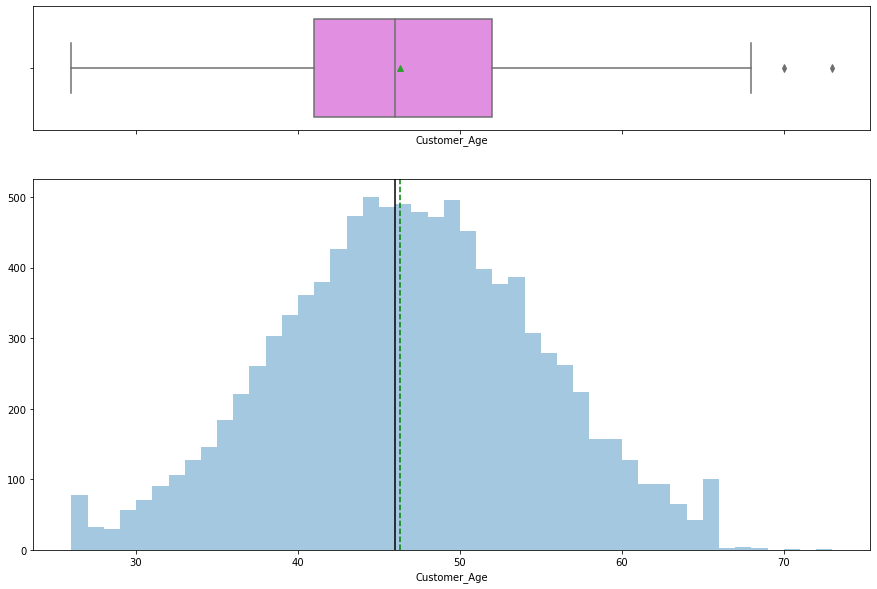

In [18]:
histogram_boxplot(data["Customer_Age"])

* As per the boxplot, there are two outliers in 'Customer_Age' variable
* Age has a fairly normal distribution with approx equal mean and median



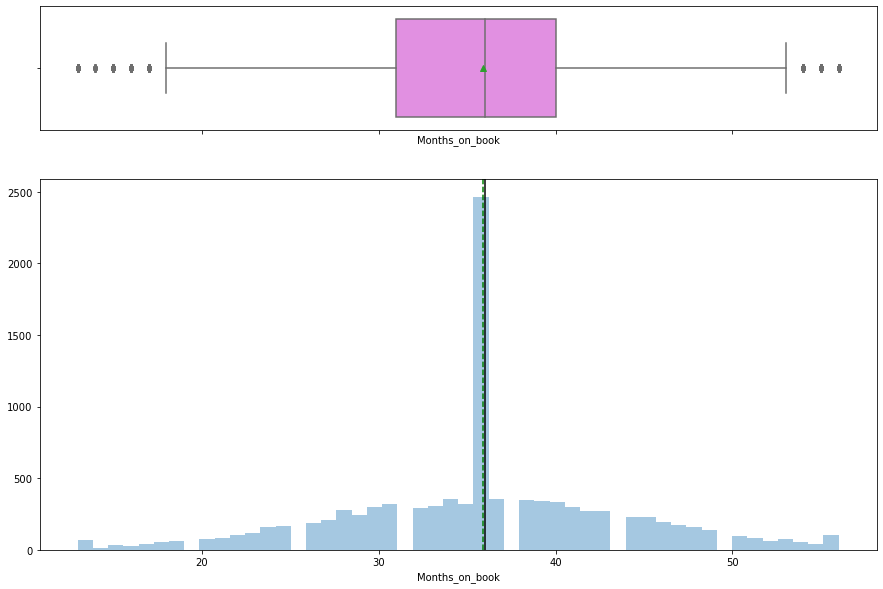

In [19]:
histogram_boxplot(data["Months_on_book"])

* There are some outliers in "Months_on_book" variable
* This variable has a high peak at center and  approx symmetric distribution around center. Approx equal mean and median. 

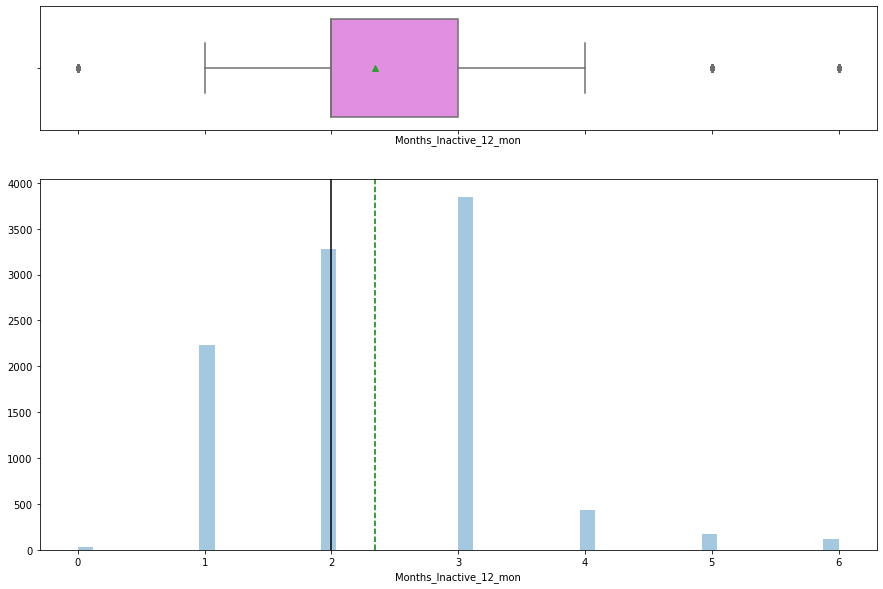

In [20]:
histogram_boxplot(data["Months_Inactive_12_mon"])   

* The number of inactive months for most of the clients is eithr 2 or 3.
* No outliers observed for this valribale.

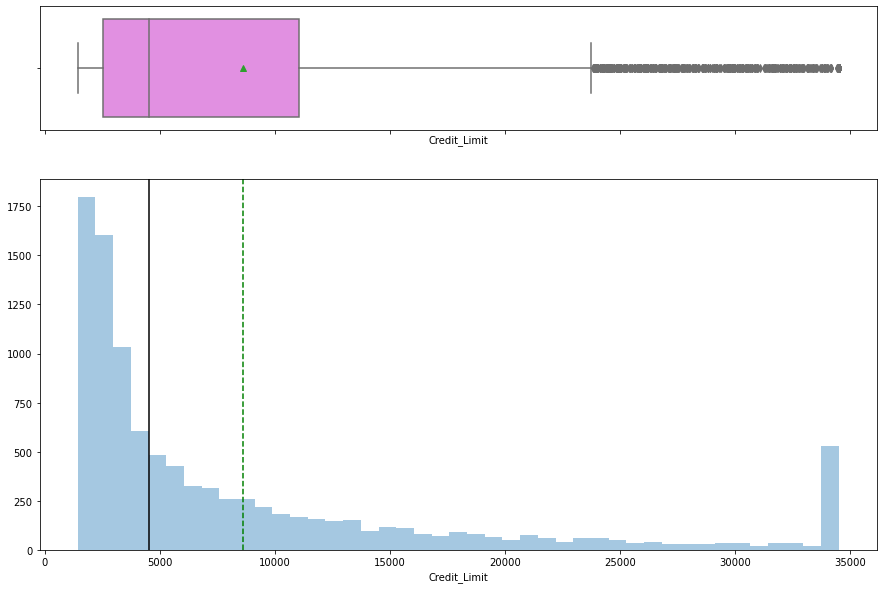

In [21]:
histogram_boxplot(data["Credit_Limit"])

* The distribution for the credit limit is right skewed.
* There are some outliers in credit limit variable. We will not remove all such data point as they represent real market trend.

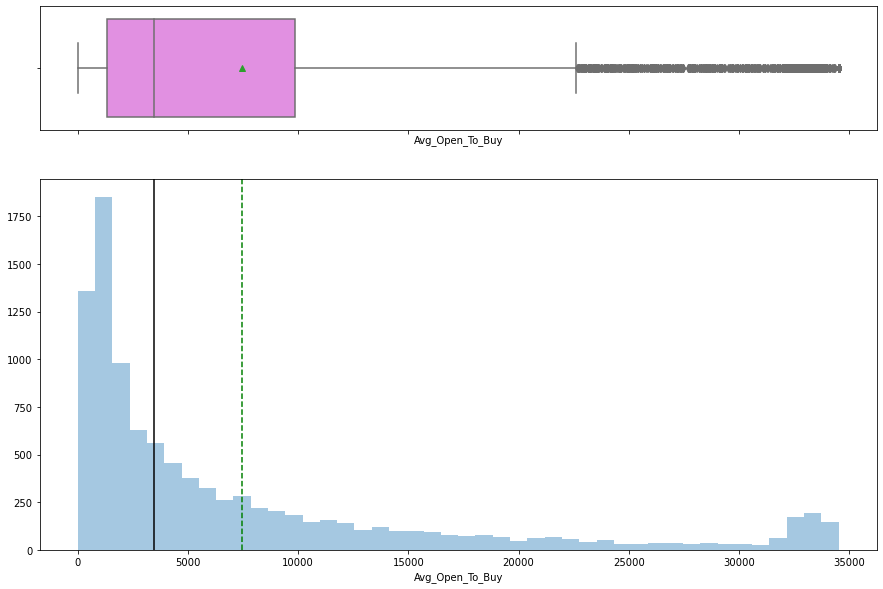

In [22]:
histogram_boxplot(data["Avg_Open_To_Buy"])

* The distribution for the Average open to buy is right skewed.
* There are some outliers in credit limit variable. We will not remove all such data point as they represent real market trend.
* Also note that beyond 30000 limit, there is little more volume of data.

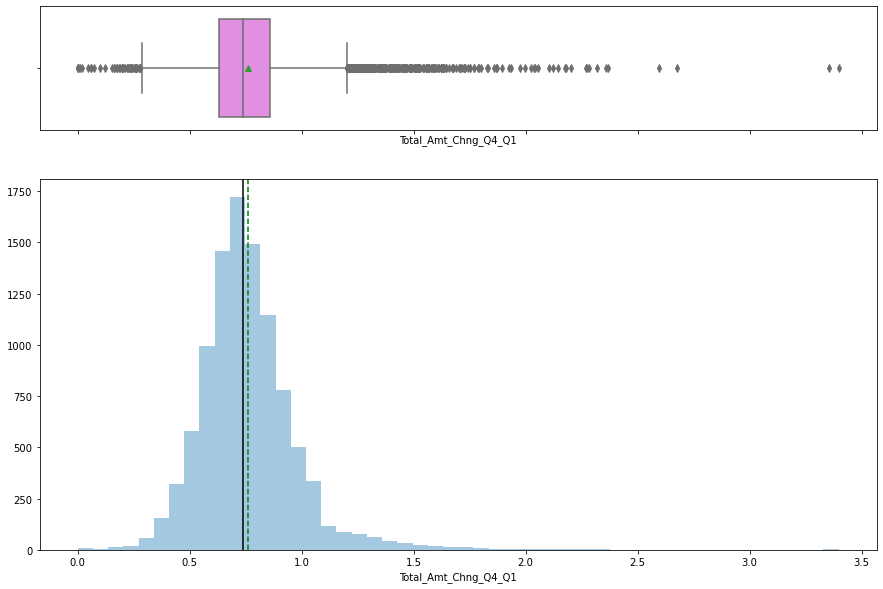

In [23]:
histogram_boxplot(data["Total_Amt_Chng_Q4_Q1"])

* The distribution for this variable is right skewed.
* There are many outliers in this variable. Around 3.4, we see two data points.If it had been only one data point then we could have considered it as entry error and would have removed it, but since it is more than one, we  will not remove this data.

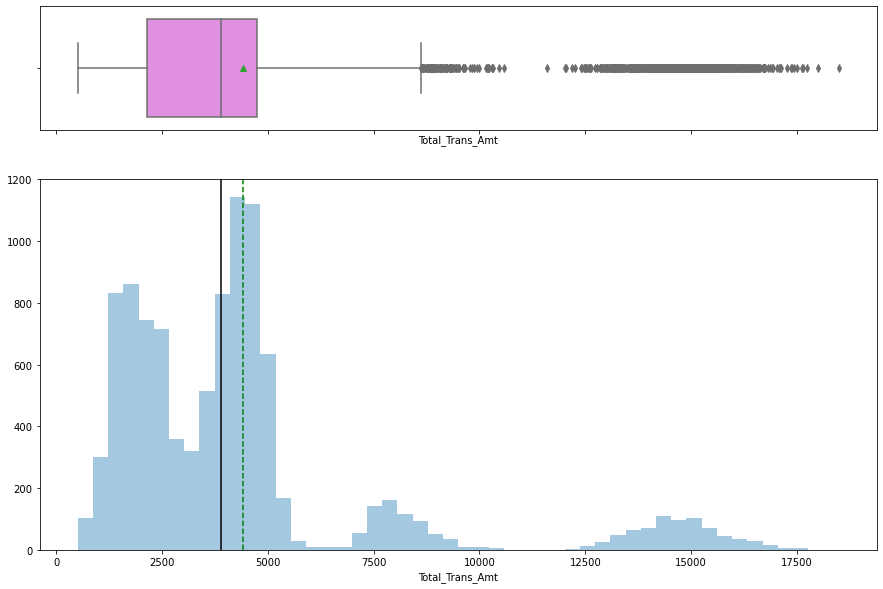

In [24]:
histogram_boxplot(data["Total_Trans_Amt"])

* The distribution for total transaction amount  is not symmetrical. In fact we can see data in 3 groups.
    * <5000
    * between 7500 to 10000
    * between 12500 and 17500


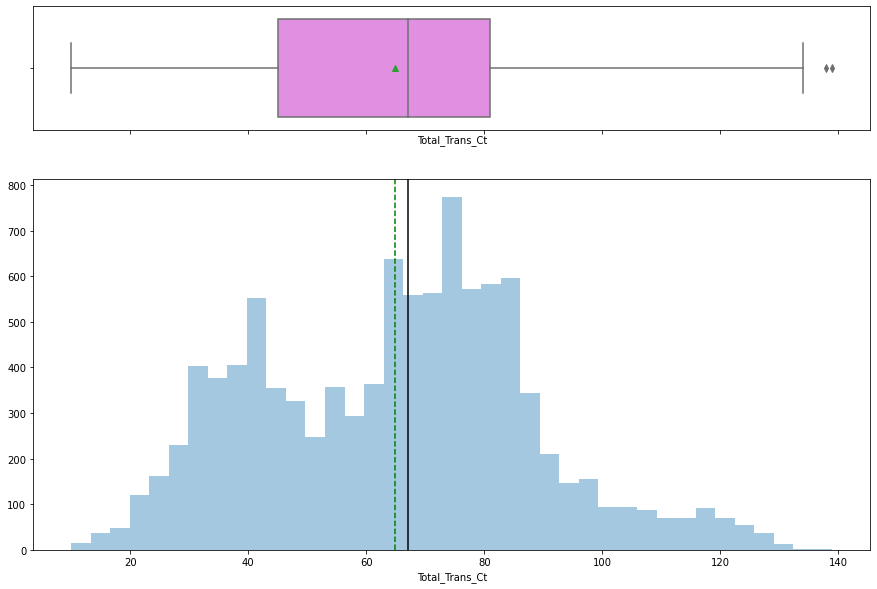

In [25]:
histogram_boxplot(data["Total_Trans_Ct"])

* We can see there are two outliers for total transaction count.
* normal distribution distribution with approx equal mean and median. 

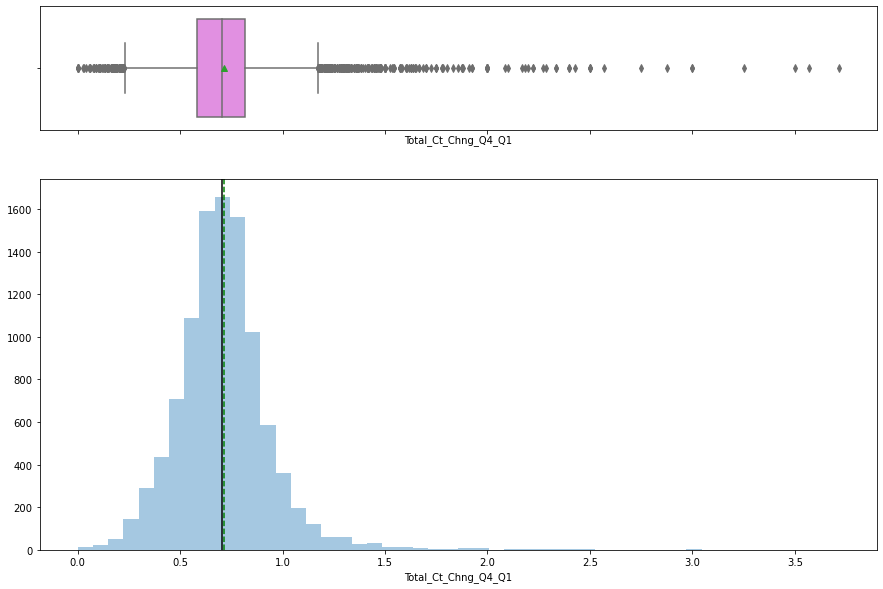

In [26]:
histogram_boxplot(data["Total_Ct_Chng_Q4_Q1"])

* The distribution for this variable is right skewed.
* There are many outliers in this variable. We will not remove all such data point as they represent real market trend.

In [27]:
def perc_on_bar(feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    # Creating a countplot for the feature
    sns.set(rc={"figure.figsize": (10, 5)})
    ax = sns.countplot(x=feature, data=data)

    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=14)  # annotate the percantage

    plt.show()  # show the plot

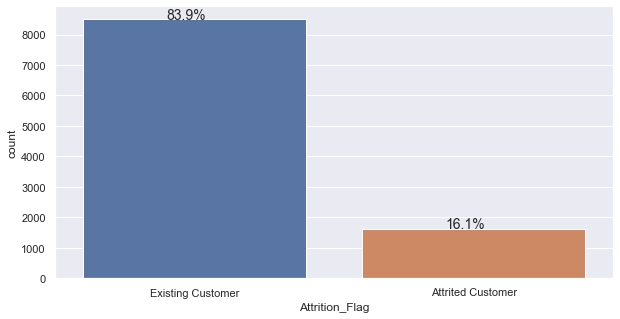

In [28]:
perc_on_bar(data["Attrition_Flag"])

* Majority of customer are existing customer.
* Attrition rate is 16.1%

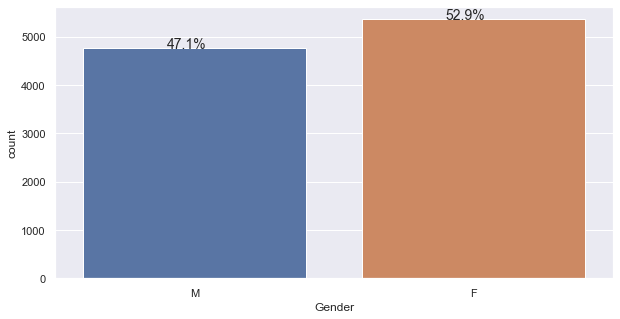

In [29]:
perc_on_bar(data["Gender"])

* Female customer are little more than male customers. 

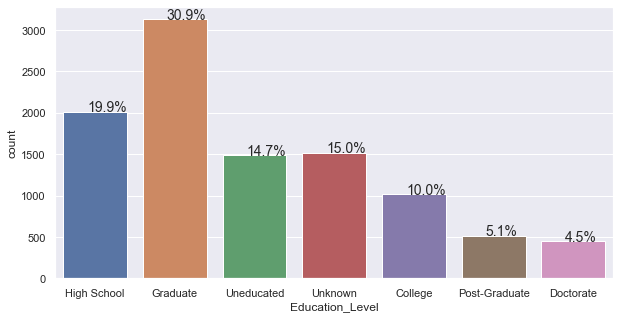

In [30]:
perc_on_bar(data["Education_Level"])

* Education of approx 31% customers is at graduation level.
* Unknown and Uneducated percentage are approx same. We will see how we need to tackle this unknown percentage of education level.

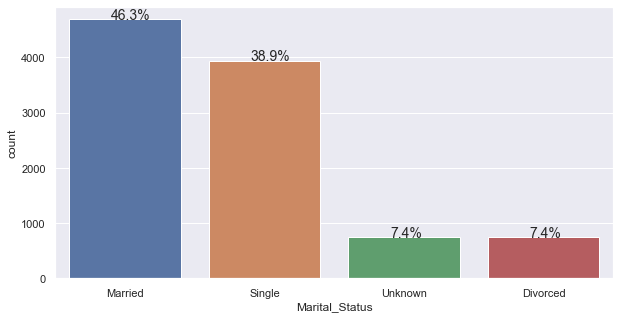

In [31]:
perc_on_bar(data["Marital_Status"])

* Highest number of customers are married.
* Unknown and Divorced percentage is same. We will see how we need to cosider this unknown percentage.

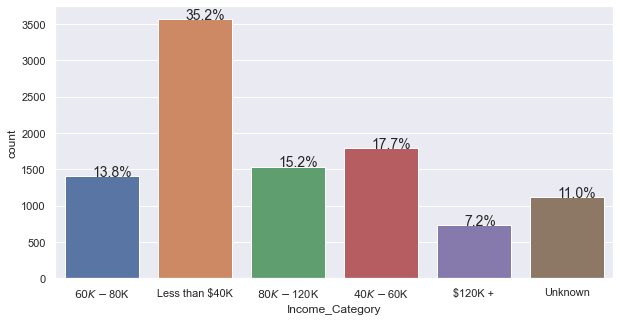

In [32]:
perc_on_bar(data["Income_Category"])

* Highest percentage of customers has income less than $40k.
* Need to handle the unknown percentage of income category.

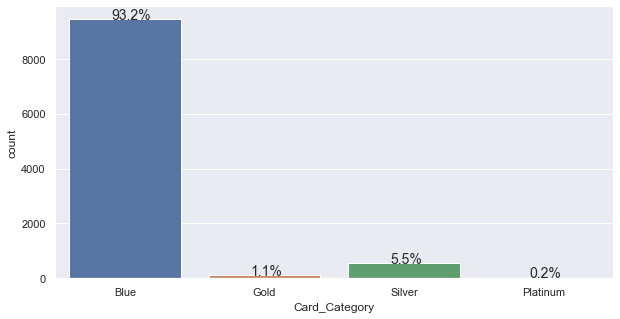

In [33]:
perc_on_bar(data["Card_Category"])

* Most of the cusotmer are of blue category followed by silver. This may be because blue category may not have any annual fees.
* Platinum and gold percentage is very very less.

### Bivariate Analysis

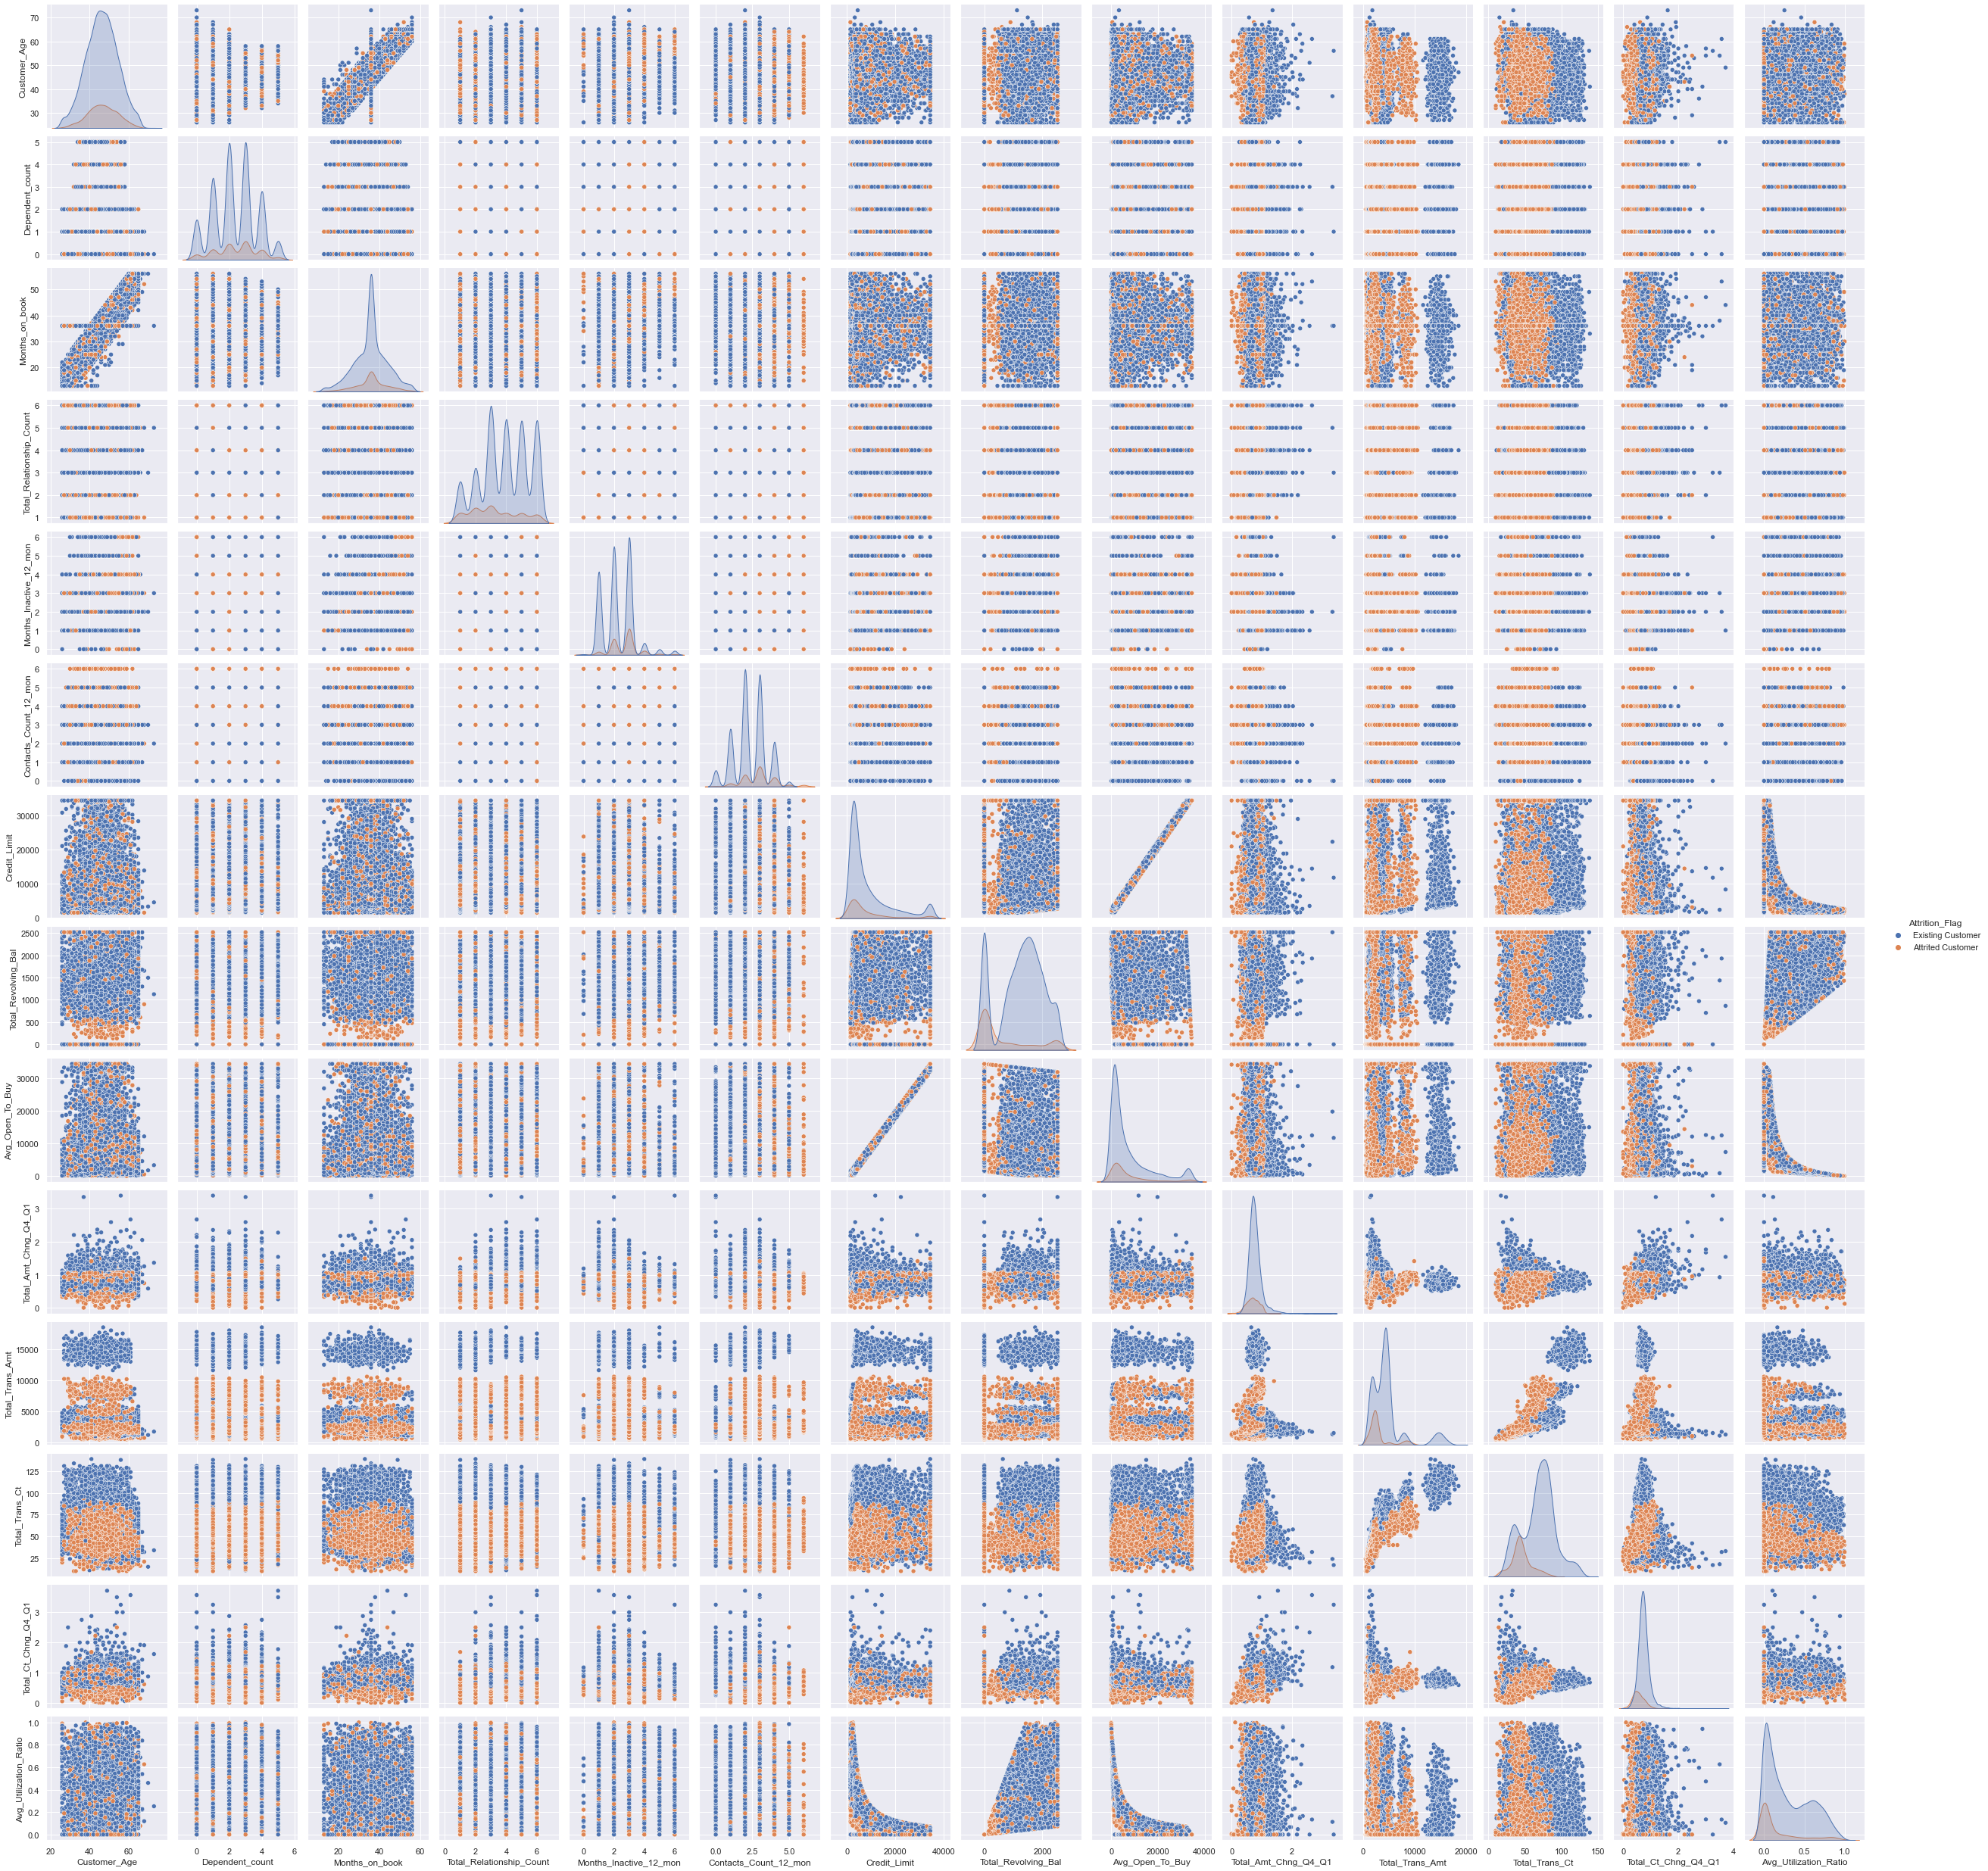

In [34]:
sns.pairplot(data, hue="Attrition_Flag")

* Customer age and Period of relationship with bank has almost linear relationship.
* Avg_Open_To_Buy and credit limit has pefect linear realtionship.
* Credit limit and Avg_Open_To_Buy has inverse reationship with Avg_Utilization_Ratio.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Months_on_book'>

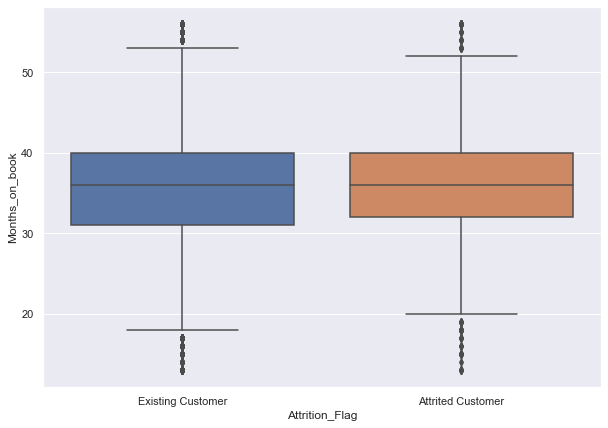

In [35]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Months_on_book", x="Attrition_Flag", data=data)

* Period of relationship with bank has no effect on attrition of customers.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Customer_Age'>

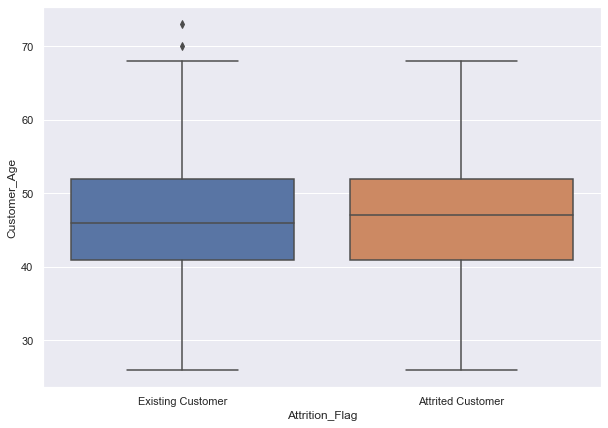

In [36]:
sns.boxplot(y="Customer_Age", x="Attrition_Flag", data=data)

* Similarly customer age also has not impact on attrition.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Dependent_count'>

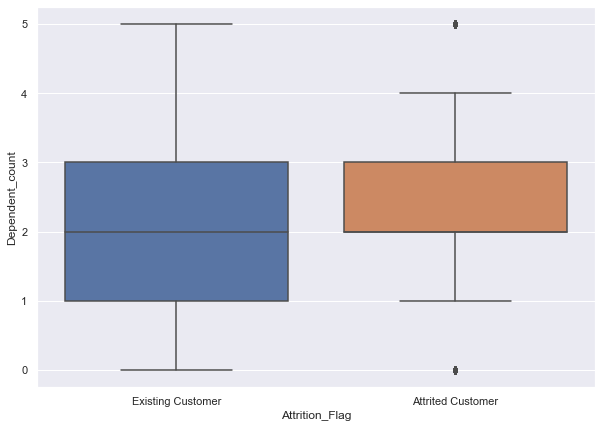

In [37]:
sns.boxplot(y="Dependent_count", x="Attrition_Flag", data=data)

* Most of existing customer have the dependent count between 1 and 3.
* Most of attrited customer have dependents either 2 or 3.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Relationship_Count'>

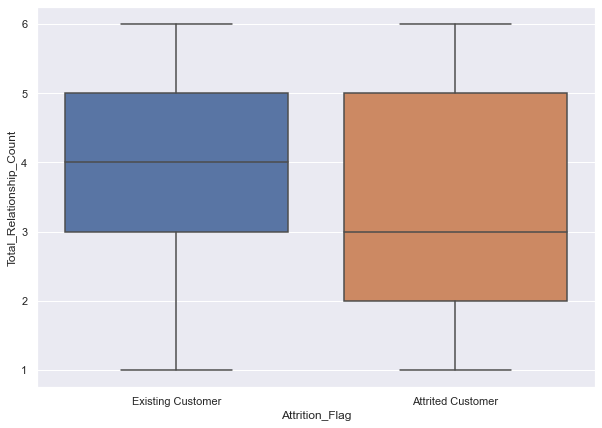

In [38]:
sns.boxplot(y="Total_Relationship_Count", x="Attrition_Flag", data=data)

* Mean value of number of products help by existing customer is 4 where as for attrited customer it is 3. It suggest if cusotmer hold more than 3 product then he is likely to stay.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Months_Inactive_12_mon'>

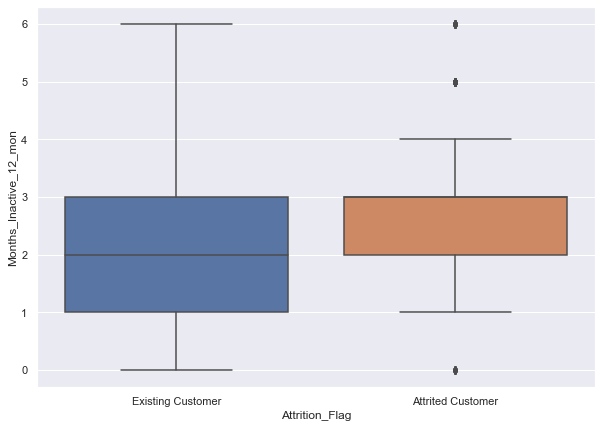

In [39]:
sns.boxplot(y="Months_Inactive_12_mon", x="Attrition_Flag", data=data)

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Contacts_Count_12_mon'>

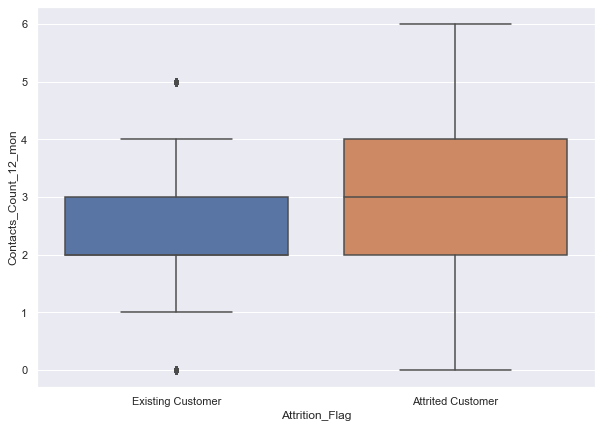

In [40]:
sns.boxplot(y="Contacts_Count_12_mon", x="Attrition_Flag", data=data)

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Credit_Limit'>

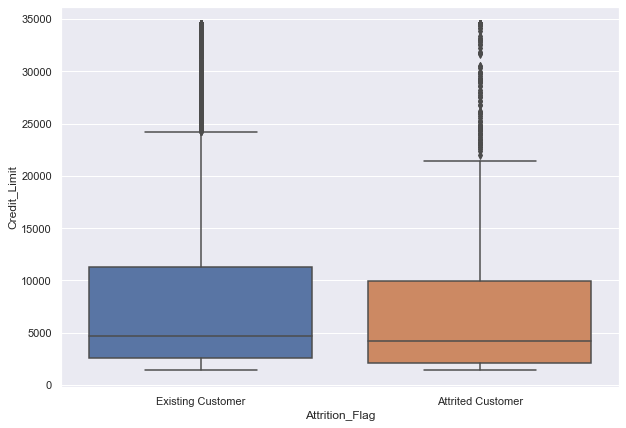

In [41]:
sns.boxplot(y="Credit_Limit", x="Attrition_Flag", data=data)

* Credit limit has almost no impact on attrition of cusotmer.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Open_To_Buy'>

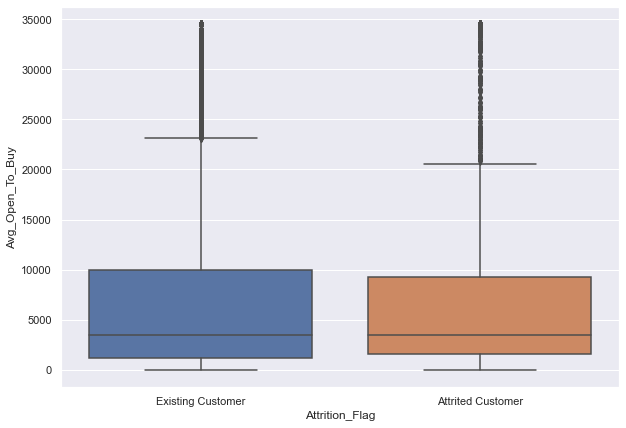

In [42]:
sns.boxplot(y="Avg_Open_To_Buy", x="Attrition_Flag", data=data)

* Similarly Avg_Open_To_Buy has almost no impact on attrition of cusotmer.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Amt_Chng_Q4_Q1'>

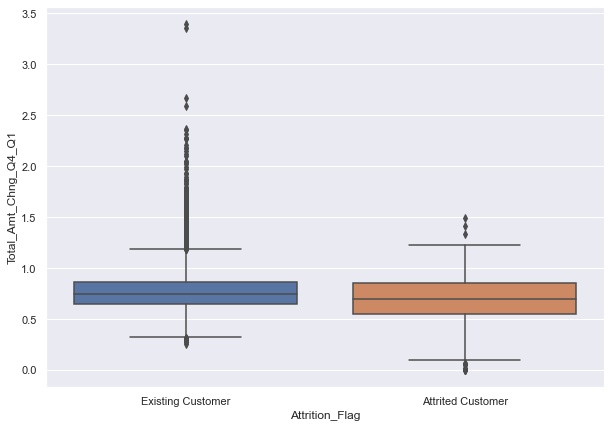

In [43]:
sns.boxplot(y="Total_Amt_Chng_Q4_Q1", x="Attrition_Flag", data=data)

* Most of the existing customers had  change in Transaction Amount Q4 over Q1.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Amt'>

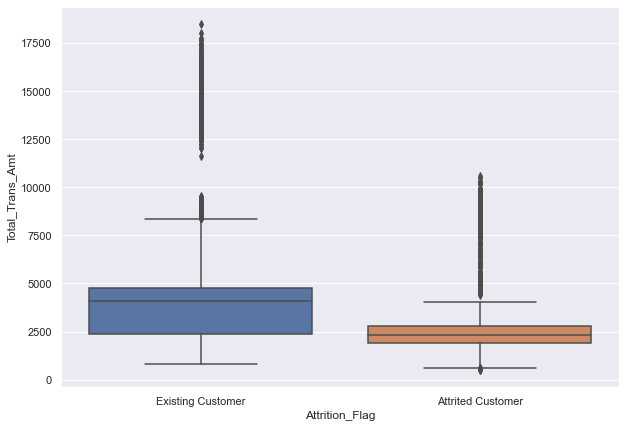

In [44]:
sns.boxplot(y="Total_Trans_Amt", x="Attrition_Flag", data=data)

* Mean value for total transation amount of attrited customer is merely 2500 and for exiting customer it is around 4300. It suggest that if customer expense is more than 4000 then he is likely to stay.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Ct'>

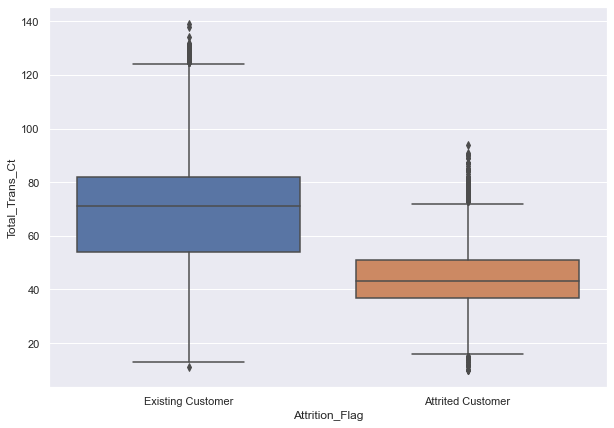

In [45]:
sns.boxplot(y="Total_Trans_Ct", x="Attrition_Flag", data=data)

* If mean value of total transaction count is more than 70 then he is likely to stay.

In [46]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, data["Attrition_Flag"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["Attrition_Flag"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


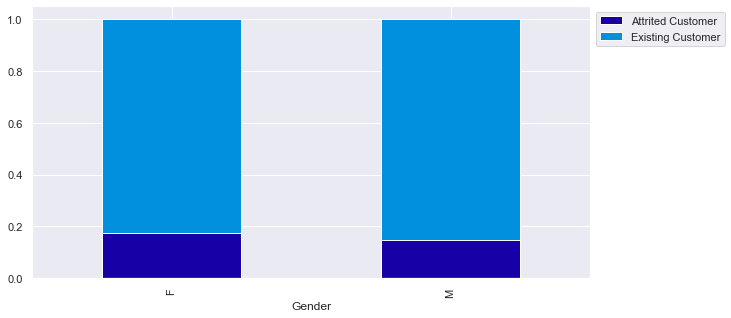

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
0                              135                769    904
1                              269               1569   1838
2                              417               2238   2655
3                              482               2250   2732
4                              260               1314   1574
5                               64                360    424
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


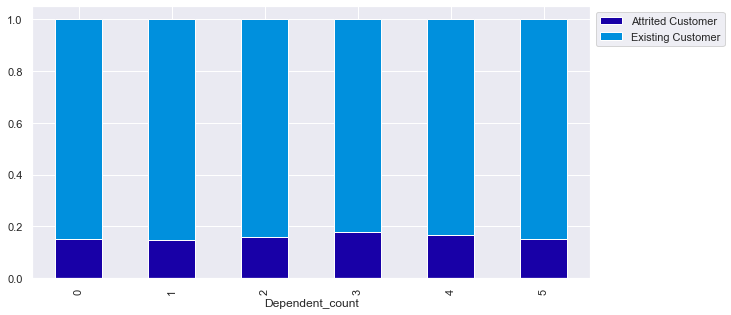

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
College                        154                859   1013
Doctorate                       95                356    451
Graduate                       487               2641   3128
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Unknown                        256               1263   1519
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


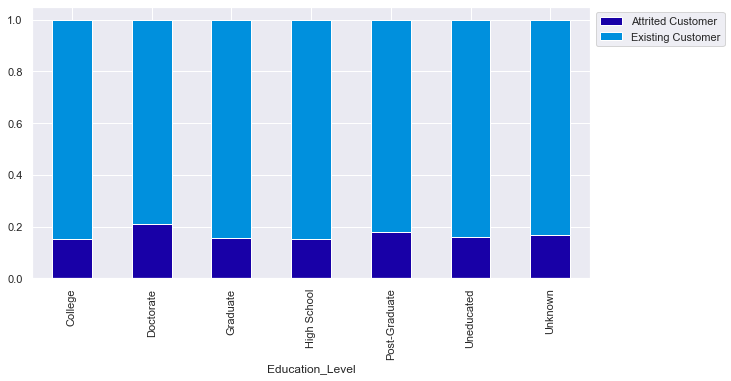

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


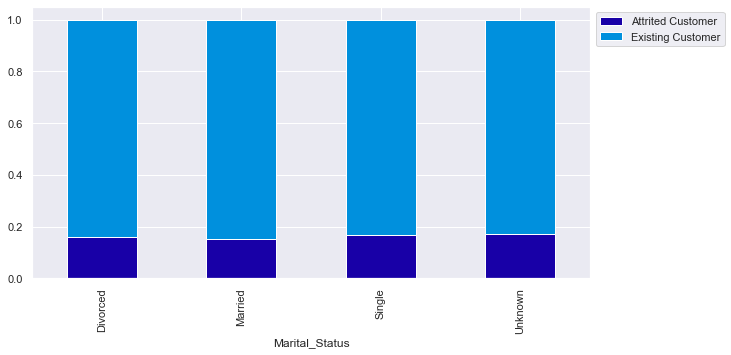

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
$120K +                        126                601    727
$40K - $60K                    271               1519   1790
$60K - $80K                    189               1213   1402
$80K - $120K                   242               1293   1535
Less than $40K                 612               2949   3561
Unknown                        187                925   1112
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


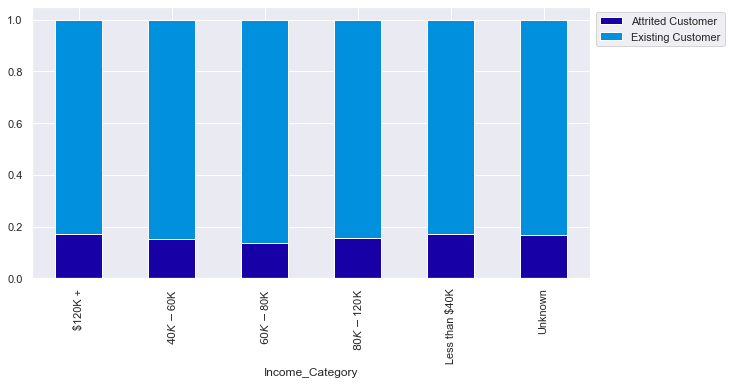

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


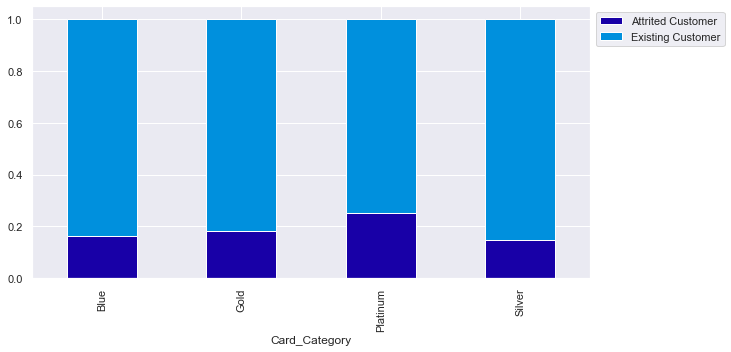

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
1                                       233                677    910
2                                       346                897   1243
3                                       400               1905   2305
4                                       225               1687   1912
5                                       227               1664   1891
6                                       196               1670   1866
All                                    1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


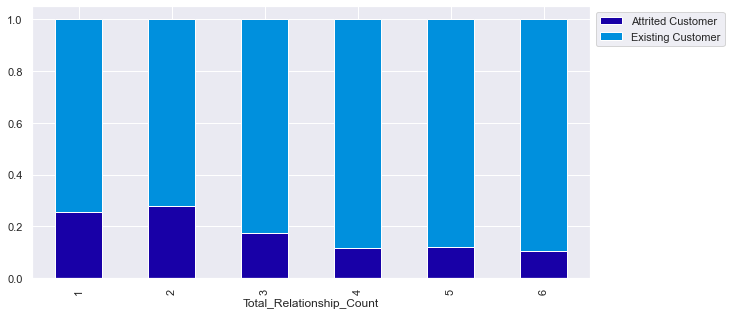

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
0                                      15                 14     29
1                                     100               2133   2233
2                                     505               2777   3282
3                                     826               3020   3846
4                                     130                305    435
5                                      32                146    178
6                                      19                105    124
All                                  1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


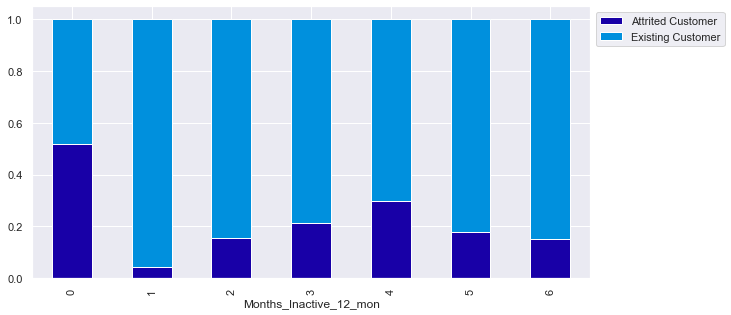

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
0                                      7                392    399
1                                    108               1391   1499
2                                    403               2824   3227
3                                    681               2699   3380
4                                    315               1077   1392
5                                     59                117    176
6                                     54                  0     54
All                                 1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


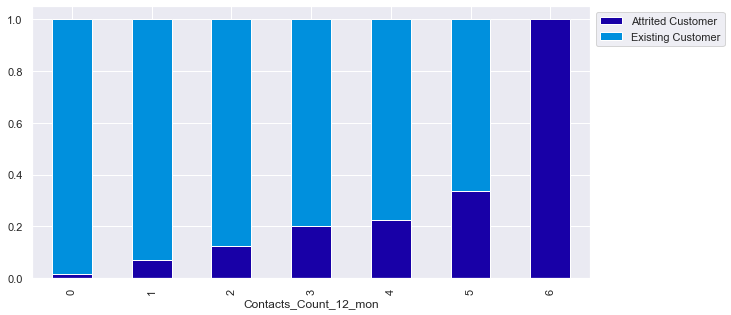

In [47]:
for c in cat_col[1:]:
    stacked_plot(data[c])

### Observations: 
* Female customers are attrited more than male cusotmers.
* Cutomers with doctarate are more likely to attrited compared to all other education level.
* Marital status, Income category and dependent count ahs almost no affect on attrition. Trend is almost smae for all these varibales.
* Platinum card cutomers are more likely to be attrited.
* If customer hold on 1 or 2 products from bank then he is more likely to leave.
* Customer who are very active(0) has higher chance of attriton. 
* Attrition rate is increasing as contact count is increasing.

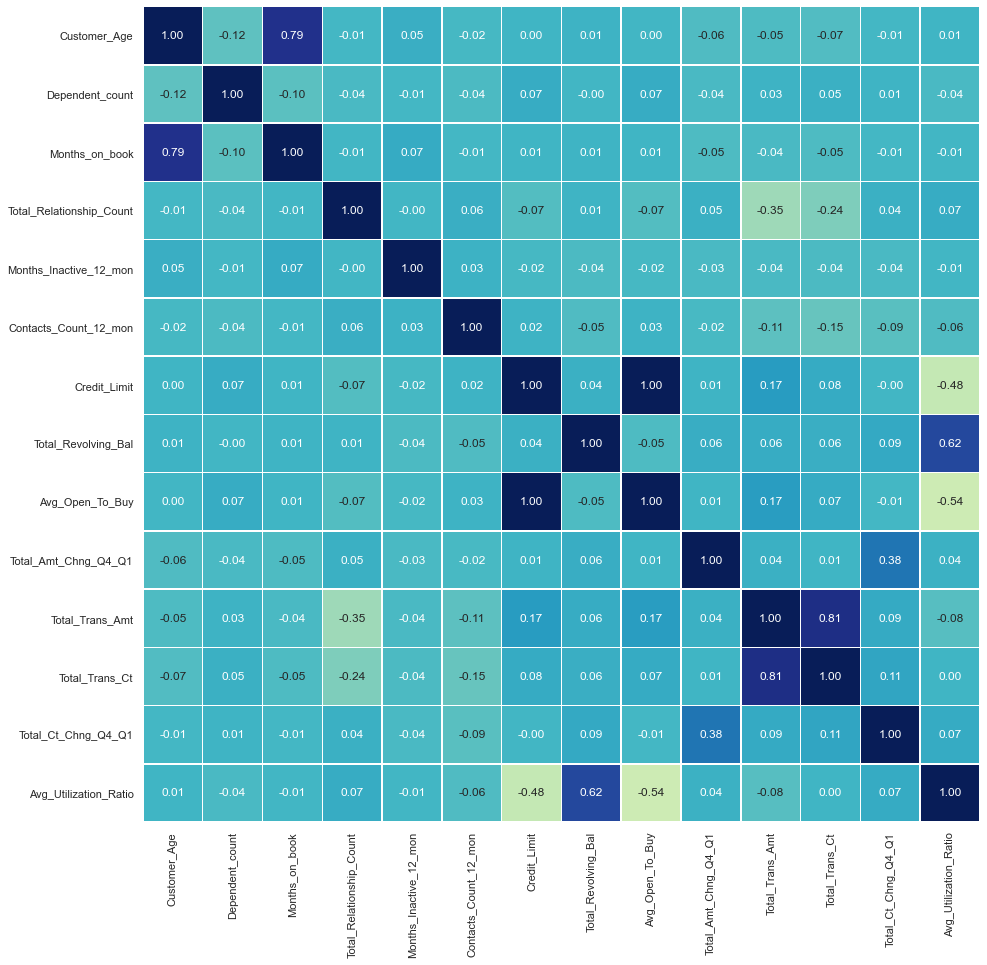

In [48]:
sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(
    data.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

* Avg_Open_To_Buy and Credit_Limit has corelation of 1 so we can drop one of these column.
* Months on book and customer age have high corelation of 0.79 but we will keep both these columns.
* Similarly Total_trans_Ct and Total_Trans_Amt has high corelation of 0.81 but we will keep both these columns as well for now.

### Missing-Value Treatment

* We have seen that three features Education_Level, Marital_Status and Income_Category has some rows as 'Unknown' We  will treat these as missing value and we will use KNN imputer to impute missing values.
* KNNImputer: Each sample's missing values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.
* KNN imputer replaces missing values using the average of k nearest non-missing feature values.
* Nearest points are found based on euclidean distance.



In [49]:
imputer = KNNImputer(n_neighbors=5)

In [50]:
reqd_col_for_impute = ['Education_Level','Marital_Status','Income_Category']

In [51]:
#Lets convert object columns into categorical variables.
for col in data.columns: 
    if data[col].dtype == 'object': 
        data[col] = pd.Categorical(data[col])
data.head(5)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [52]:
data[reqd_col_for_impute].head()

Education_Level Marital_Status Income_Category
0     High School        Married     $60K - $80K
1        Graduate         Single  Less than $40K
2        Graduate        Married    $80K - $120K
3     High School        Unknown  Less than $40K
4      Uneducated        Married     $60K - $80K

In [79]:
data1=data.copy()

In [80]:
# we need to pass numerical values for each categorical column for KNN imput
Education_Level= {'Uneducated':0, 'High School':1,'College':2,'Graduate':3, 'Post-Graduate':4, 'Doctorate':5}  
data1['Education_Level'] = data1['Education_Level'].map(Education_Level)

Marital_Status = {'Single':0,'Married':1,'Divorced':2}
data1['Marital_Status'] = data1['Marital_Status'].map(Marital_Status)

Income_Category ={'Less than $40K':0,'$40K - $60K':1,'$80K - $120K':2,'$60K - $80K':3,'$120K +':4}
data1['Income_Category'] = data1['Income_Category'].map(Income_Category)


In [81]:
data1.head()

Attrition_Flag  Customer_Age Gender  Dependent_count  Education_Level  \
0  Existing Customer            45      M                3              1.0   
1  Existing Customer            49      F                5              3.0   
2  Existing Customer            51      M                3              3.0   
3  Existing Customer            40      F                4              1.0   
4  Existing Customer            40      M                3              0.0   

   Marital_Status  Income_Category Card_Category  Months_on_book  \
0             1.0              3.0          Blue              39   
1             0.0              0.0          Blue              44   
2             1.0              2.0          Blue              36   
3             NaN              0.0          Blue              34   
4             1.0              3.0          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

* Values have been encoded.

### Split the data

In [82]:
X = data1.drop(['Attrition_Flag'],axis=1)
y = data1['Attrition_Flag'].apply(lambda x : 0 if x=='Existing Customer' else 1)

In [83]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


#### Imputing Missing Values 

In [84]:
#Fit and transform the train data
X_train[reqd_col_for_impute]=imputer.fit_transform(X_train[reqd_col_for_impute])

#Transform the test data 
X_test[reqd_col_for_impute]=imputer.transform(X_test[reqd_col_for_impute])

In [85]:
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

* All missing values have been treated.
* Let's inverse map the encoded values.

In [86]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

In [87]:
inverse_mapping(Education_Level,'Education_Level')
inverse_mapping(Marital_Status,'Marital_Status')
inverse_mapping(Income_Category,'Income_Category')

* Checking inverse mapped values/categories.

In [88]:
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3753
M    3335
Name: Gender, dtype: int64
******************************
Graduate         2482
High School      1630
College          1270
Uneducated       1032
Post-Graduate     352
Doctorate         322
Name: Education_Level, dtype: int64
******************************
Married     3685
Single      2865
Divorced     538
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2692
$40K - $60K       1547
$80K - $120K      1389
$60K - $80K        956
$120K +            504
Name: Income_Category, dtype: int64
******************************
Blue        6619
Silver       373
Gold          81
Platinum      15
Name: Card_Category, dtype: int64
******************************


In [89]:
cols = X_test.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3753
M    3335
Name: Gender, dtype: int64
******************************
Graduate         2482
High School      1630
College          1270
Uneducated       1032
Post-Graduate     352
Doctorate         322
Name: Education_Level, dtype: int64
******************************
Married     3685
Single      2865
Divorced     538
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2692
$40K - $60K       1547
$80K - $120K      1389
$60K - $80K        956
$120K +            504
Name: Income_Category, dtype: int64
******************************
Blue        6619
Silver       373
Gold          81
Platinum      15
Name: Card_Category, dtype: int64
******************************


### Encoding categorical varaibles 

In [90]:
# Transforming the categorical variables to numerical
X_train=pd.get_dummies(X_train,columns=cat_col[1:])
X_test=pd.get_dummies(X_test,columns=cat_col[1:])
print(X_train.shape, X_test.shape)

(7088, 56) (3039, 56)


* After encoding there are 56 columns.

In [91]:
X_train.head()

Customer_Age  Months_on_book  Credit_Limit  Total_Revolving_Bal  \
5672            35              30       13590.0                 1528   
3138            48              36        2708.0                 2517   
856             46              34        2925.0                 2365   
7365            44              30        2709.0                 1726   
8685            43              36        7350.0                 1360   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
5672          12062.0                 0.728             2137              52   
3138            191.0                 0.568             2198              41   
856             560.0                 0.691             1371              30   
7365            983.0                 0.698             5056              89   
8685           5990.0                 0.744             7679              64   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  ...  \
5672                0.486                  0.112  ...   
3138                0.864                  0.929  ...   
856                 0.579                  0.809  ...   
7365                0.780                  0.637  ...   
8685                0.684                  0.185  ...   

      Months_Inactive_12_mon_4  Months_Inactive_12_mon_5  \
5672                         0                         0   
3138                         0                         0   
856                          0                         0   
7365                         0                         0   
8685                         0                         0   

      Months_Inactive_12_mon_6  Contacts_Count_12_mon_0  \
5672                         0                        0   
3138                         0                        1   
856                          0                        0   
7365                         0                        0   
8685                         0                        1   

      Contacts_Count_12_mon_1  Contacts_Count_12_mon_2  \
5672                        0                        0   
3138                        0                        0   
856                         0                        0   
7365                        1                        0   
8685                        0                        0   

      Contacts_Count_12_mon_3  Contacts_Count_12_mon_4  \
5672                        0                        1   
3138                        0                        0   
856                         1                        0   
7365                        0                        0   
8685                        0                        0   

      Contacts_Count_12_mon_5  Contacts_Count_12_mon_6  
5672                        0                        0  
3138                        0                        0  
856                         0                        0  
7365                        0                        0  
8685                        0                        0  

[5 rows x 56 columns]

In [92]:
X_train.columns

Index(['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_F', 'Gender_M', 'Dependent_count_0', 'Dependent_count_1',
       'Dependent_count_2', 'Dependent_count_3', 'Dependent_count_4',
       'Dependent_count_5', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Card_Category_Blue',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver',
       'Total_Relationship_Count_1', 'Total_Re

**Before building the model, let's create functions to calculate different metrics- Accuracy, Recall and Precision and plot the confusion matrix.**

In [93]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [94]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

### Model building - Logistic Regression

In [142]:
# Fit the model on original data i.e. before upsampling
lr_model_withoutSampling = LogisticRegression()
lr_model_withoutSampling.fit(X_train, y_train)
y_predict = lr_model_withoutSampling.predict(X_test)

In [143]:
lr_model_score=get_metrics_score(lr_model_withoutSampling)

Accuracy on training set :  0.8910835214446953
Accuracy on test set :  0.889108259295821
Recall on training set :  0.4995610184372256
Recall on test set :  0.48770491803278687
Precision on training set :  0.7380025940337225
Precision on test set :  0.7323076923076923


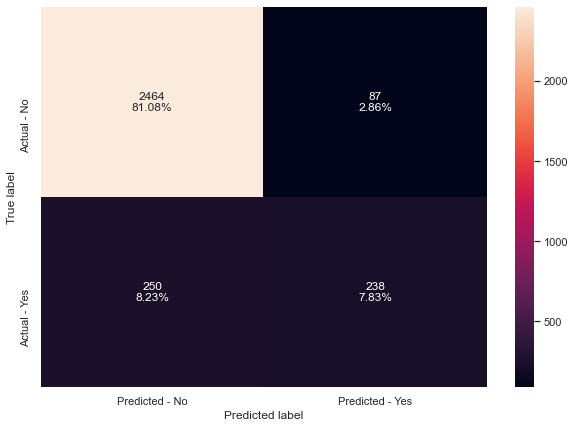

In [144]:
make_confusion_matrix(lr_model_withoutSampling,y_test)

#### SMOTE to upsample smaller class 

In [97]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))



print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

Before UpSampling, counts of label '1': 1139
Before UpSampling, counts of label '0': 5949 

After UpSampling, counts of label '1': 5949
After UpSampling, counts of label '0': 5949 

After UpSampling, the shape of train_X: (11898, 56)
After UpSampling, the shape of train_y: (11898,) 



In [137]:
# fit model on upsampled data 
lr_model_withUpSampling = LogisticRegression()
lr_model_withUpSampling.fit(X_train_res, y_train_res)
y_predict = lr_model_withUpSampling.predict(X_test)

In [138]:
lr_model_score=get_metrics_score(lr_model_withUpSampling)

Accuracy on training set :  0.850028216704289
Accuracy on test set :  0.8506087528792365
Recall on training set :  0.4749780509218613
Recall on test set :  0.5020491803278688
Precision on training set :  0.5377733598409543
Precision on test set :  0.5372807017543859


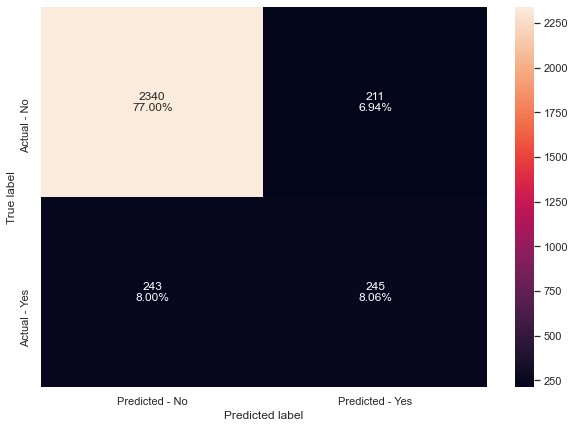

In [145]:
make_confusion_matrix(lr_model_withUpSampling,y_test)

#### Down Sampling the larger class 

In [101]:
Existing_Customer_indices = data1[data1['Attrition_Flag'] == 'Existing Customer'].index   
Existing_Customer = len(data1[data1['Attrition_Flag'] == 'Existing Customer'])            
print(Existing_Customer)

Attrited_Customer_indices = data1[data1['Attrition_Flag'] == 'Attrited Customer'].index       
Attrited_Customer = len(data1[data1['Attrition_Flag'] == 'Attrited Customer'])               
print(Attrited_Customer)

8500
1627


In [105]:
#Randomly pick up 1600 Existing_Customer indices
random_indices = np.random.choice( Existing_Customer_indices, 1600 , replace=False)    

In [106]:
# combine the 1600 Existing Customer indices with Attrited Customer indices
down_sample_indices = np.concatenate([Attrited_Customer_indices,random_indices])  

In [116]:
data1_down_sample = data1.loc[down_sample_indices]  # Extract all those records for Existing Customer and Attrited Customer to create new set
data1_down_sample.groupby(["Attrition_Flag"]).count()  # look at the class distribution after downsample

Customer_Age  Gender  Dependent_count  Education_Level  \
Attrition_Flag                                                              
Attrited Customer          1627    1627             1627             1371   
Existing Customer          1600    1600             1600             1351   

                   Marital_Status  Income_Category  Card_Category  \
Attrition_Flag                                                      
Attrited Customer            1498             1440           1627   
Existing Customer            1483             1418           1600   

                   Months_on_book  Total_Relationship_Count  \
Attrition_Flag                                                
Attrited Customer            1627                      1627   
Existing Customer            1600                      1600   

                   Months_Inactive_12_mon  Contacts_Count_12_mon  \
Attrition_Flag                                                     
Attrited Customer                    1627                   1627   
Existing Customer                    1600                   1600   

                   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
Attrition_Flag                                                          
Attrited Customer          1627                 1627             1627   
Existing Customer          1600                 1600             1600   

                   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
Attrition_Flag                                                             
Attrited Customer                  1627             1627            1627   
Existing Customer                  1600             1600            1600   

                   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
Attrition_Flag                                                 
Attrited Customer                 1627                   1627  
Existing Customer                 1600                   1600

In [118]:
X_down = data1_down_sample.drop(['Attrition_Flag'],axis=1)
y_down = data1_down_sample['Attrition_Flag'].apply(lambda x : 0 if x=='Existing Customer' else 1)

In [127]:
X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(X_down, y_down, test_size=0.3, random_state=7)
print(X_train_down.shape, X_test_down.shape)

(2258, 19) (969, 19)


In [128]:
#Fit and transform the train data
X_train_down[reqd_col_for_impute]=imputer.fit_transform(X_train_down[reqd_col_for_impute])

#Transform the test data 
X_test_down[reqd_col_for_impute]=imputer.transform(X_test_down[reqd_col_for_impute])

In [130]:
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train_down[y] = np.round(X_train_down[y]).map(inv_dict).astype('category')
    X_test_down[y] = np.round(X_test_down[y]).map(inv_dict).astype('category')

In [131]:
inverse_mapping(Education_Level,'Education_Level')
inverse_mapping(Marital_Status,'Marital_Status')
inverse_mapping(Income_Category,'Income_Category')

In [132]:
X_train_down=pd.get_dummies(X_train_down,columns=cat_col[1:])
X_test_down=pd.get_dummies(X_test_down,columns=cat_col[1:])
print(X_train_down.shape, X_test_down.shape)

(2258, 56) (969, 56)


In [139]:
lr_model_withDownSampling = LogisticRegression()
lr_model_withDownSampling.fit(X_train_down, y_train_down)
y_predict_down = lr_model_withDownSampling.predict(X_test_down)

In [140]:
lr_model_score=get_metrics_score(lr_model_withDownSampling)

Accuracy on training set :  0.8450902934537246
Accuracy on test set :  0.845343863112866
Recall on training set :  0.7611940298507462
Recall on test set :  0.7377049180327869
Precision on training set :  0.5121086828115771
Precision on test set :  0.5128205128205128


* We can see the recall score is best for Down sampled data

### Model building - Bagging and Boosting 

**Bagging Classifier**

In [149]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [150]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9954853273137697
Accuracy on test set :  0.953932214544258
Recall on training set :  0.9771729587357331
Recall on test set :  0.7930327868852459
Precision on training set :  0.9946380697050938
Precision on test set :  0.9084507042253521


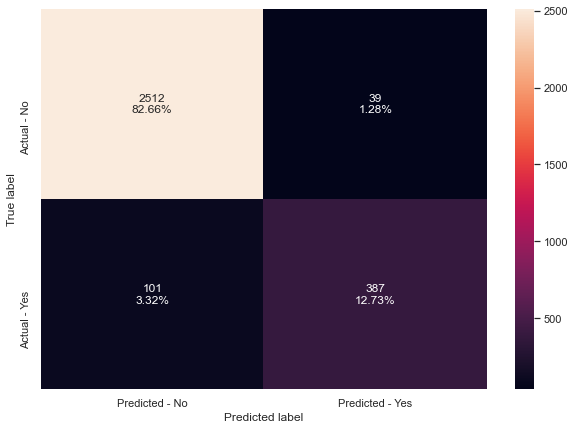

In [151]:
make_confusion_matrix(bagging_estimator,y_test)

**Random Forest Classifier**

In [152]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [153]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9493254359986838
Recall on training set :  1.0
Recall on test set :  0.7336065573770492
Precision on training set :  1.0
Precision on test set :  0.93717277486911


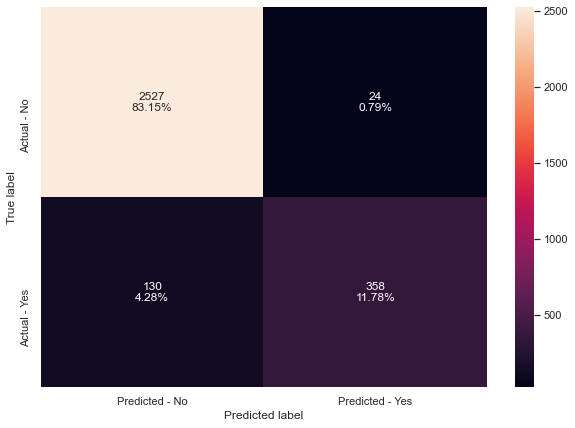

In [154]:
make_confusion_matrix(rf_estimator,y_test)

**Decision Tree Model**

In [155]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [156]:
dTree_estimator_score=get_metrics_score(dTree)

Accuracy on training set :  1.0
Accuracy on test set :  0.9259624876604146
Recall on training set :  1.0
Recall on test set :  0.7848360655737705
Precision on training set :  1.0
Precision on test set :  0.7614314115308151


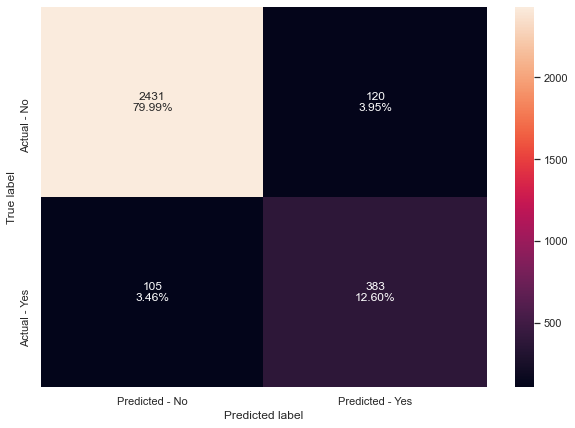

In [157]:
make_confusion_matrix(dTree,y_test)

**Observatios:**
1. All three models are overfitting the train data.
2. Decision tree is least performing in term of accuracy but random forest has least recall. 
3. Out of these three models, bagging classifier is best performin overall.

#### Reducing overfitting

In [158]:
#Let's try Limiting the max_depth of tree to 5
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=5,random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

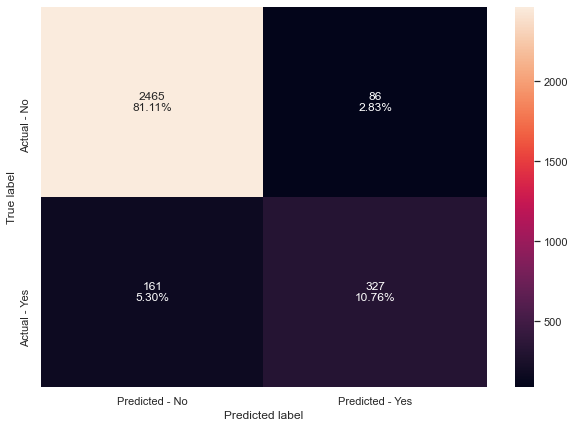

In [159]:
make_confusion_matrix(dTree1, y_test)

In [160]:
dTree1_estimator_score=get_metrics_score(dTree1)

Accuracy on training set :  0.9431433408577878
Accuracy on test set :  0.9187232642316552
Recall on training set :  0.7497805092186128
Recall on test set :  0.6700819672131147
Precision on training set :  0.8786008230452675
Precision on test set :  0.7917675544794189


* Recall on training set has reduced from 1 to 0.75 but this is an improvement because now the model is not overfitting and recall on test data is also around 0.67. We have a generalized model.

**AdaBoost Classifier**

In [161]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [162]:
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.9637415349887133
Accuracy on test set :  0.9532741033234616
Recall on training set :  0.8647936786654961
Recall on test set :  0.8114754098360656
Precision on training set :  0.9053308823529411
Precision on test set :  0.8878923766816144


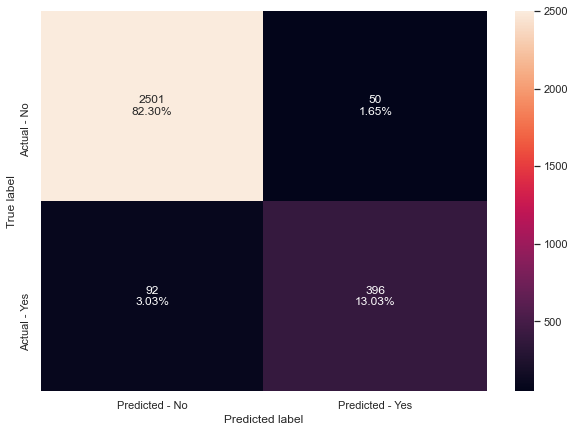

In [163]:
make_confusion_matrix(abc,y_test)

**Gradient Boosting Classifier**

In [164]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [165]:
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.9770033860045146
Accuracy on test set :  0.9618295491938138
Recall on training set :  0.8964003511852502
Recall on test set :  0.8340163934426229
Precision on training set :  0.9577861163227017
Precision on test set :  0.920814479638009


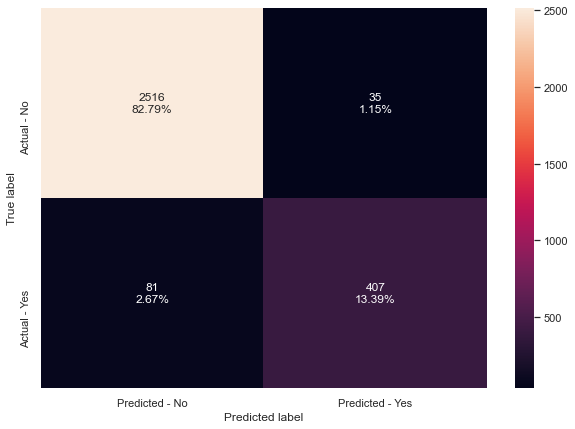

In [166]:
make_confusion_matrix(gbc,y_test)

**XGBoost Classifier**

In [167]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

[16:34:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [168]:
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  1.0
Accuracy on test set :  0.9713721618953604
Recall on training set :  1.0
Recall on test set :  0.8688524590163934
Precision on training set :  1.0
Precision on test set :  0.9485458612975392


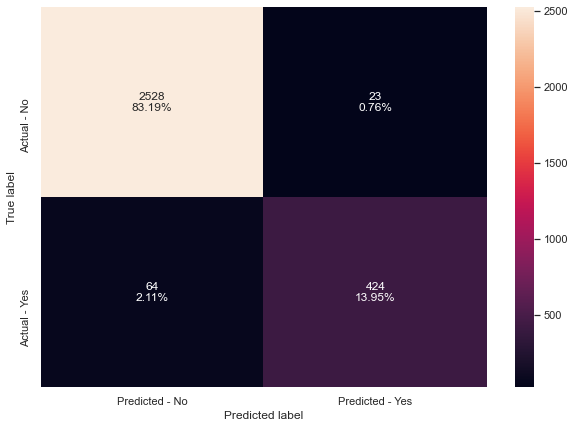

In [169]:
make_confusion_matrix(xgb,y_test)

**Observation**
1. XGBoost model overfits the train data.
2. For XGBoost Recall is not improved significantly compared to ada boost and gradient boost.
3. Gradien boost classifier is givng better performance among all boosting classifier.

## Hyperparameter tuning using grid search

### Bagging Classifier

In [219]:
%%time 
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

parameters = {'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators' : [10,20,30,40,50],
             }

acc_scorer = metrics.make_scorer(metrics.recall_score)


grid_obj = GridSearchCV(pipe, parameters, scoring=acc_scorer,cv=5,n_jobs = -1, verbose = 2)
grid_obj = grid_obj.fit(X_train, y_train)

bagging_estimator_gridSearch_tuned = grid_obj.best_estimator_

bagging_estimator_gridSearch_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Wall time: 1min 56s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(max_features=0.9, max_samples=0.7,
                                   n_estimators=40, random_state=1))])

In [171]:
bagging_estimator_gridSearch_tuned_score=get_metrics_score(bagging_estimator_gridSearch_tuned)

Accuracy on training set :  0.9971783295711061
Accuracy on test set :  0.9585389930898321
Recall on training set :  0.9833187006145742
Recall on test set :  0.8114754098360656
Precision on training set :  0.9991079393398751
Precision on test set :  0.9209302325581395


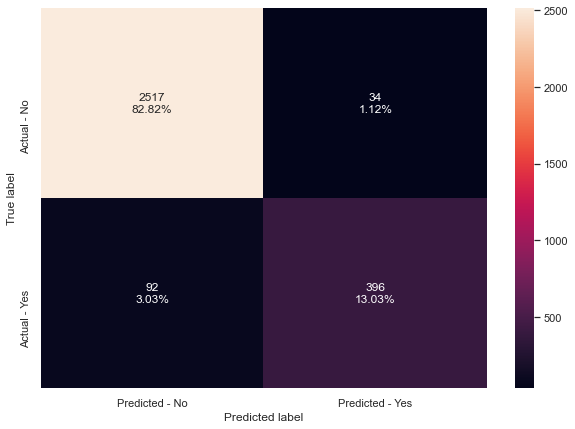

In [172]:
make_confusion_matrix(bagging_estimator_gridSearch_tuned,y_test)

**Observation**

1. Model is overfitting the data.
2. Test Recall is low as compared to other model we have seen above.
3. Time taken is 1 min 56 Sec.

### Random Forest 

In [218]:
%%time 
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

parameters = {"randomforestclassifier__n_estimators": [150,200,250],
    "randomforestclassifier__min_samples_leaf": np.arange(5, 10),
    "randomforestclassifier__max_features": np.arange(0.2, 0.7, 0.1),
             }

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(pipe, parameters, scoring=acc_scorer,cv=5,n_jobs = -1, verbose = 2)
grid_obj = grid_obj.fit(X_train, y_train)

randomForestf_estimator_gridSearch_tuned = grid_obj.best_estimator_

randomForestf_estimator_gridSearch_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
Wall time: 9min 28s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=0.6000000000000001,
                                        min_samples_leaf=5, n_estimators=150,
                                        random_state=1))])

In [174]:
randomForestf_estimator_gridSearch_tuned_score=get_metrics_score(bagging_estimator_gridSearch_tuned)

Accuracy on training set :  0.9971783295711061
Accuracy on test set :  0.9585389930898321
Recall on training set :  0.9833187006145742
Recall on test set :  0.8114754098360656
Precision on training set :  0.9991079393398751
Precision on test set :  0.9209302325581395


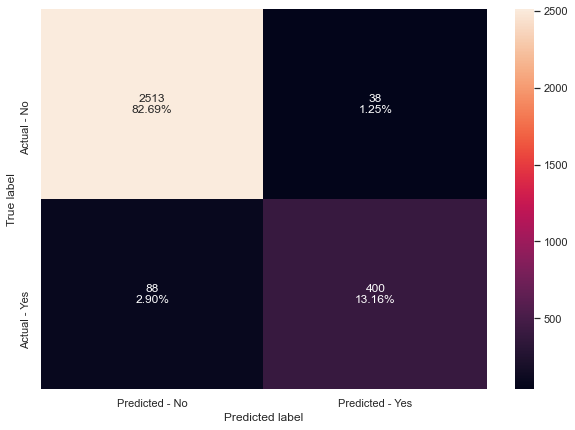

In [175]:
make_confusion_matrix(randomForestf_estimator_gridSearch_tuned,y_test)

**Observation**

1. Model is overfitting the data.
2. Test Recall is low as compared to other model we have seen above.
3. Time taken is 9 min 28 Sec. Increased from previous model.

### Decision Tree

In [220]:
%%time 

pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

parameters = {'decisiontreeclassifier__max_depth': [4,5,6,7], 
              'decisiontreeclassifier__min_samples_leaf': [5, 7, 10,15,20],
              'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10],
              'decisiontreeclassifier__min_impurity_decrease': [0.001,0.01,0.1]
             }

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(pipe, parameters, scoring=acc_scorer,cv=5,n_jobs = -1, verbose = 2)
grid_obj = grid_obj.fit(X_train, y_train)

dTree_estimator_gridSearch_tuned = grid_obj.best_estimator_

dTree_estimator_gridSearch_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Wall time: 32.5 s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10,
                                        min_impurity_decrease=0.001,
                                        min_samples_leaf=5, random_state=1))])

In [177]:
dTree_estimator_gridSearch_tuned_score=get_metrics_score(dTree_estimator_gridSearch_tuned)

Accuracy on training set :  0.9280474040632054
Accuracy on test set :  0.9035867061533399
Recall on training set :  0.8024582967515365
Recall on test set :  0.7336065573770492
Precision on training set :  0.762301918265221
Precision on test set :  0.6871401151631478


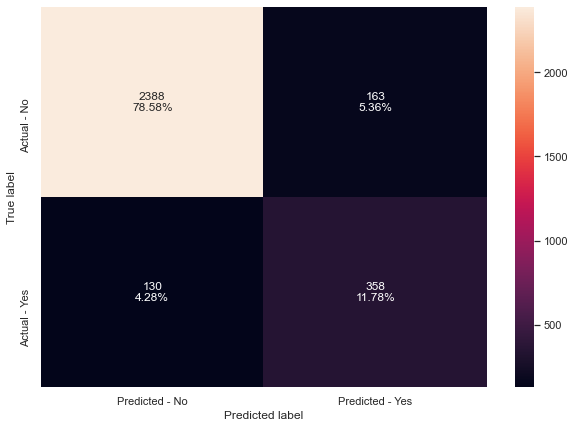

In [178]:
make_confusion_matrix(dTree_estimator_gridSearch_tuned,y_test)

**Observation**

1. The overfitting is slightly reduced.
2. Test Recall has also decreased as compared to other model we have seen above.
3. Time taken is just 32.5 Sec.

### ADA Boost 

In [221]:
%%time 

pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))


parameters = {
    "adaboostclassifier__base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "adaboostclassifier__n_estimators": np.arange(10,110,10),
    "adaboostclassifier__learning_rate":np.arange(0.1,2,0.1)
}


acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(pipe, parameters, scoring=acc_scorer,cv=5,n_jobs = -1, verbose = 2)
grid_obj = grid_obj.fit(X_train, y_train)

abc_estimator_gridSearch_tuned = grid_obj.best_estimator_

abc_estimator_gridSearch_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 570 candidates, totalling 2850 fits
Wall time: 23min 27s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                    learning_rate=1.1, n_estimators=100,
                                    random_state=1))])

In [180]:
abc_estimator_gridSearch_tuned_score=get_metrics_score(abc_estimator_gridSearch_tuned)

Accuracy on training set :  0.9983069977426636
Accuracy on test set :  0.9631457716354064
Recall on training set :  0.9929762949956101
Recall on test set :  0.8545081967213115
Precision on training set :  0.9964757709251101
Precision on test set :  0.9104803493449781


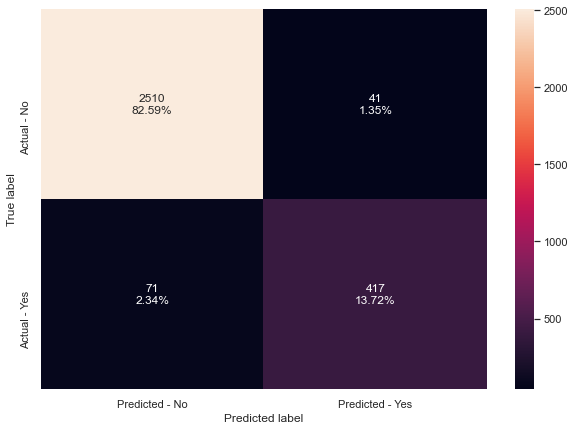

In [181]:
make_confusion_matrix(abc_estimator_gridSearch_tuned,y_test)

**Observation**

1. Model is overfitting the data.
2. Test Recall is little improved here.
3. Time taken is 23 min 27 Sec. 

### Gradient Boost 

In [215]:
%%time 

pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

parameters = {"gradientboostingclassifier__n_estimators": [150,200,250],
    "gradientboostingclassifier__learning_rate": np.arange(0.1,2,0.2),
    "gradientboostingclassifier__max_features": np.arange(0.2, 0.6, 0.1),
             }

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(pipe, parameters, scoring=acc_scorer,cv=5,n_jobs = -1, verbose = 2)
grid_obj = grid_obj.fit(X_train, y_train)

gb_estimator_gridSearch_tuned = grid_obj.best_estimator_

gb_estimator_gridSearch_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Wall time: 8min 35s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.30000000000000004,
                                            max_features=0.4000000000000001,
                                            n_estimators=150,
                                            random_state=1))])

In [216]:
gb_estimator_gridSearch_tuned_score=get_metrics_score(gb_estimator_gridSearch_tuned)

Accuracy on training set :  0.9966139954853274
Accuracy on test set :  0.9726883843369529
Recall on training set :  0.9868305531167691
Recall on test set :  0.8790983606557377
Precision on training set :  0.9920564872021183
Precision on test set :  0.9470198675496688


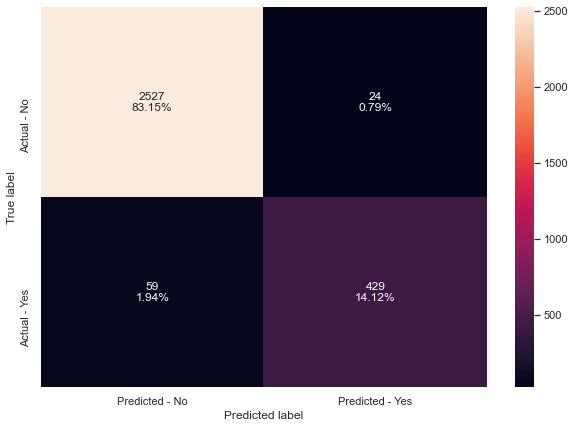

In [217]:
make_confusion_matrix(gb_estimator_gridSearch_tuned,y_test)

**Observation**

1. Model is overfitting the data.
2. Test Recall is little improved here.
3. Time taken is 8 min and 35 Sec.

### XG Boost 

In [212]:
%%time 

pipe = make_pipeline(StandardScaler(), XGBClassifier(random_state=1))

parameters = {
    "xgbclassifier__n_estimators": np.arange(10,100,20),
    "xgbclassifier__scale_pos_weight":[0,1,2,5],
    "xgbclassifier__subsample":[0.5,0.7,0.9,1],
    "xgbclassifier__learning_rate":[0.01,0.1,0.2,0.05],
    "xgbclassifier__gamma":[0,1,3],
    "xgbclassifier__colsample_bytree":[0.5,0.7,0.9,1],
    "xgbclassifier__colsample_bylevel":[0.5,0.7,0.9,1]
}


acc_scorer = metrics.make_scorer(metrics.recall_score)


grid_obj = GridSearchCV(pipe, parameters,scoring=acc_scorer,cv=5,n_jobs = -1, verbose = 2)
grid_obj = grid_obj.fit(X_train, y_train)

xgb_estimator_gridSearch_tuned = grid_obj.best_estimator_

xgb_estimator_gridSearch_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 15360 candidates, totalling 76800 fits
[01:39:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:39:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 7h 31min 13s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.5, gamma=3, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=5,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [213]:
xgb_estimator_gridSearch_tuned_score=get_metrics_score(xgb_estimator_gridSearch_tuned)

Accuracy on training set :  0.9782731376975169
Accuracy on test set :  0.9555774925962488
Recall on training set :  0.9964881474978051
Recall on test set :  0.9221311475409836
Precision on training set :  0.8832684824902723
Precision on test set :  0.8226691042047533


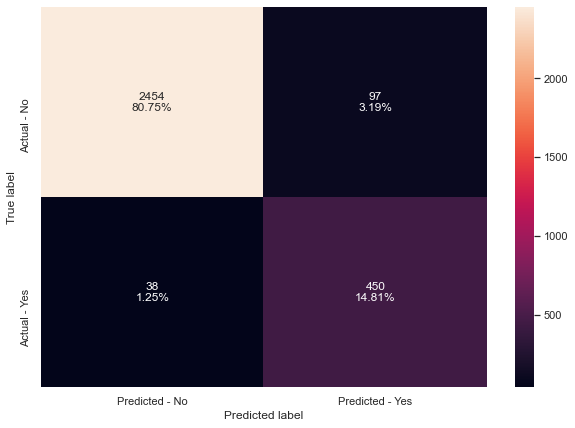

In [214]:
make_confusion_matrix(xgb_estimator_gridSearch_tuned,y_test)

**Observation**

1. The overfitting is greately reduced.
2. Test Recall has also increased as compared to other model we have seen above.
3. Time taken is 7 hr and 31 mins 35 Sec which is highest amongst all baove models. We will see Random search reduces this or not.

## Hyperparameter tuning using random search

### Bagging Classifier

In [187]:
%%time 

pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

parameters = {'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators' : [10,20,30,40,50],
             }

acc_scorer = metrics.make_scorer(metrics.recall_score)


grid_obj = RandomizedSearchCV(pipe, parameters, scoring=acc_scorer,cv=5,n_jobs = -1, verbose = 2)
grid_obj = grid_obj.fit(X_train, y_train)

bagging_estimator_randomSearch_tuned = grid_obj.best_estimator_

bagging_estimator_randomSearch_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Wall time: 22.6 s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(max_features=0.9, max_samples=0.8,
                                   n_estimators=40, random_state=1))])

In [189]:
bagging_estimator_gridSearch_tuned_score=get_metrics_score(bagging_estimator_randomSearch_tuned)

Accuracy on training set :  0.998589164785553
Accuracy on test set :  0.9591971043106285
Recall on training set :  0.9920983318700615
Recall on test set :  0.8176229508196722
Precision on training set :  0.9991158267020336
Precision on test set :  0.9193548387096774


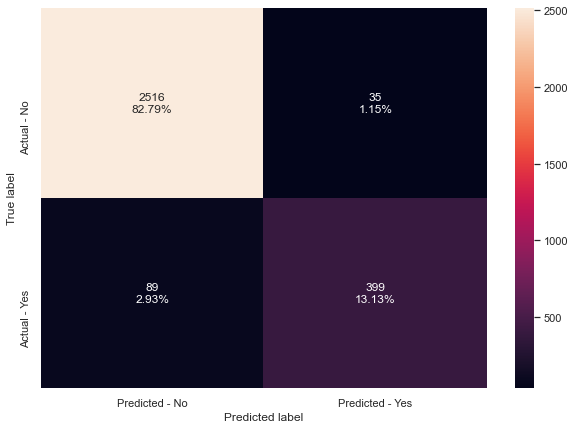

In [190]:
make_confusion_matrix(bagging_estimator_randomSearch_tuned,y_test)

**Observation**

1. Model is overfitting the data.
2. Test Recall is little improved here compared to grid search bagging classifier.
3. Time taken is 8 min and 35 Sec.

### Random Forest 

In [188]:
%%time 

pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

parameters = {"randomforestclassifier__n_estimators": [150,200,250],
    "randomforestclassifier__min_samples_leaf": np.arange(5, 10),
    "randomforestclassifier__max_features": np.arange(0.2, 0.7, 0.1),
             }

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = RandomizedSearchCV(pipe, parameters, scoring=acc_scorer,cv=5,n_jobs = -1, verbose = 2)
grid_obj = grid_obj.fit(X_train, y_train)

randomForestf_estimator_randomSearch_tuned = grid_obj.best_estimator_

randomForestf_estimator_randomSearch_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Wall time: 1min 16s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=0.6000000000000001,
                                        min_samples_leaf=5, n_estimators=150,
                                        random_state=1))])

In [191]:
randomForestf_estimator_randomSearch_tuned_score=get_metrics_score(randomForestf_estimator_randomSearch_tuned)

Accuracy on training set :  0.9834932279909706
Accuracy on test set :  0.9585389930898321
Recall on training set :  0.9297629499561019
Recall on test set :  0.819672131147541
Precision on training set :  0.9662408759124088
Precision on test set :  0.91324200913242


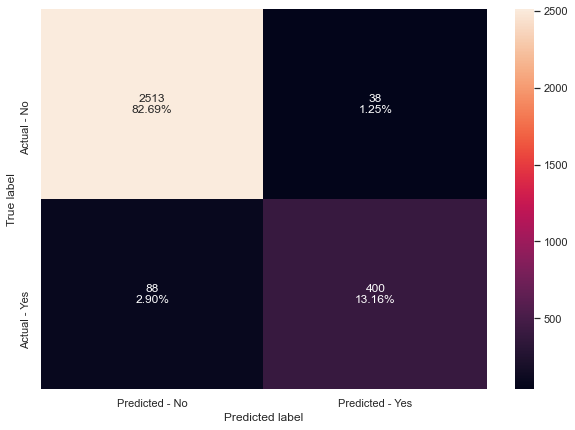

In [192]:
make_confusion_matrix(randomForestf_estimator_randomSearch_tuned,y_test)

**Observation**

1. Model is overfitting the data.
2. Test Recall is low as compared to other model we have seen above.
3. Time taken is 1 min 16 Sec. Significantly reduced from previous model.

### Decision Tree

In [193]:
%%time 

pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

parameters = {'decisiontreeclassifier__max_depth': [4,5,6,7], 
              'decisiontreeclassifier__min_samples_leaf': [5, 7, 10,15,20],
              'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10],
              'decisiontreeclassifier__min_impurity_decrease': [0.001,0.01,0.1]
             }

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = RandomizedSearchCV(pipe, parameters, scoring=acc_scorer,cv=5,n_jobs = -1, verbose = 2)
grid_obj = grid_obj.fit(X_train, y_train)

dTree_estimator_randomSearch_tuned = grid_obj.best_estimator_

dTree_estimator_randomSearch_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Wall time: 1.48 s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5,
                                        min_impurity_decrease=0.001,
                                        min_samples_leaf=10, random_state=1))])

In [194]:
dTree_estimator_randomSearch_tuned_score=get_metrics_score(dTree_estimator_randomSearch_tuned)

Accuracy on training set :  0.8981376975169301
Accuracy on test set :  0.8894373149062191
Recall on training set :  0.5610184372256365
Recall on test set :  0.5245901639344263
Precision on training set :  0.7421602787456446
Precision on test set :  0.7111111111111111


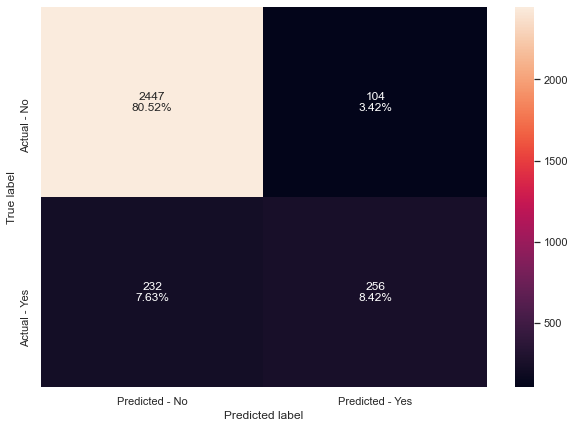

In [195]:
make_confusion_matrix(dTree_estimator_randomSearch_tuned,y_test)

**Observation**

1. Overfitting is greatly reducd.
2. Test Recall is very low as compared to other model we have seen above.
3. Time taken is just 1.48 sec. This is quickest model yet.

### ADA Boost 

In [196]:
%%time 

pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))


parameters = {
    "adaboostclassifier__base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "adaboostclassifier__n_estimators": np.arange(10,110,10),
    "adaboostclassifier__learning_rate":np.arange(0.1,2,0.1)
}


acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = RandomizedSearchCV(pipe, parameters, scoring=acc_scorer,cv=5,n_jobs = -1, verbose = 2)
grid_obj = grid_obj.fit(X_train, y_train)

abc_estimator_randomSearch_tuned = grid_obj.best_estimator_

abc_estimator_randomSearch_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Wall time: 24.4 s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                    n_estimators=90, random_state=1))])

In [197]:
abc_estimator_randomSearch_tuned_score=get_metrics_score(abc_estimator_randomSearch_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.9638038828562027
Recall on training set :  1.0
Recall on test set :  0.8545081967213115
Precision on training set :  1.0
Precision on test set :  0.9144736842105263


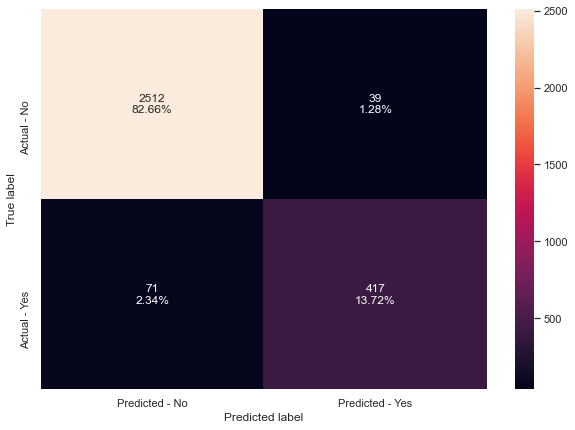

In [198]:
make_confusion_matrix(abc_estimator_randomSearch_tuned,y_test)

**Observation**

1. This model is clearly Overfitting.
2. Test Recall is also low as compared to other model we have seen above.
3. Time taken is just 24.4 sec.

### Gradient Boost 

In [199]:
%%time 

pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

parameters = {"gradientboostingclassifier__n_estimators": [150,200,250],
    "gradientboostingclassifier__learning_rate": np.arange(0.1,2,0.2),
    "gradientboostingclassifier__max_features": np.arange(0.2, 0.6, 0.1),
             }

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = RandomizedSearchCV(pipe, parameters, scoring=acc_scorer,cv=5,n_jobs = -1, verbose = 2)
grid_obj = grid_obj.fit(X_train, y_train)

gb_estimator_randomSearch_tuned = grid_obj.best_estimator_

gb_estimator_randomSearch_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Wall time: 39.1 s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.30000000000000004,
                                            max_features=0.4000000000000001,
                                            n_estimators=200,
                                            random_state=1))])

In [200]:
gb_estimator_randomSearch_tuned_score=get_metrics_score(gb_estimator_randomSearch_tuned)

Accuracy on training set :  0.9990124153498872
Accuracy on test set :  0.9733464955577492
Recall on training set :  0.9956101843722563
Recall on test set :  0.8790983606557377
Precision on training set :  0.9982394366197183
Precision on test set :  0.9512195121951219


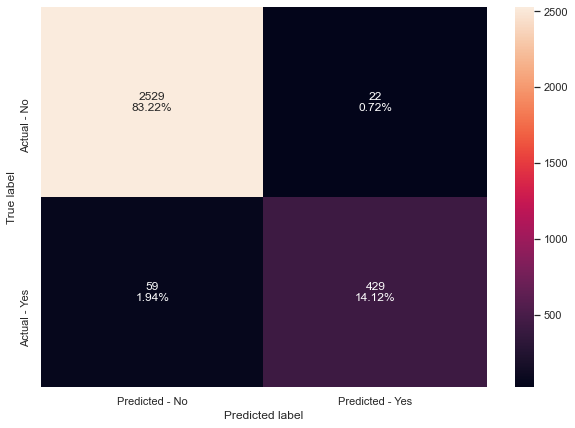

In [201]:
make_confusion_matrix(gb_estimator_randomSearch_tuned,y_test)

**Observation**

1. This model is Overfitting the data.
2. Test Recall is coparable with other model we have seen above.
3. Time taken is just 39.1 sec.

### XG Boost 

In [209]:
%%time 

pipe = make_pipeline(StandardScaler(), XGBClassifier(random_state=1))

parameters = {
    "xgbclassifier__n_estimators": np.arange(10,100,20),
    "xgbclassifier__scale_pos_weight":[0,1,2,5],
    "xgbclassifier__subsample":[0.5,0.7,0.9,1],
    "xgbclassifier__learning_rate":[0.01,0.1,0.2,0.05],
    "xgbclassifier__gamma":[0,1,3],
    "xgbclassifier__colsample_bytree":[0.5,0.7,0.9,1],
    "xgbclassifier__colsample_bylevel":[0.5,0.7,0.9,1]
}


acc_scorer = metrics.make_scorer(metrics.recall_score)


grid_obj = RandomizedSearchCV(pipe, parameters,scoring=acc_scorer,cv=5,n_jobs = -1, verbose = 2)
grid_obj = grid_obj.fit(X_train, y_train)

xgb_estimator_randomSearch_tuned = grid_obj.best_estimator_

xgb_estimator_randomSearch_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[18:07:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:07:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 14.5 s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=0.7, colsample_bynode=1,
                               colsample_bytree=0.5, gamma=3, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=70,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=5,
                               subsample=0.7, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [210]:
xgb_estimator_randomSearch_tuned_score=get_metrics_score(xgb_estimator_randomSearch_tuned)

Accuracy on training set :  0.9803893905191874
Accuracy on test set :  0.9615004935834156
Recall on training set :  0.9947322212467077
Recall on test set :  0.930327868852459
Precision on training set :  0.8949447077409163
Precision on test set :  0.845437616387337


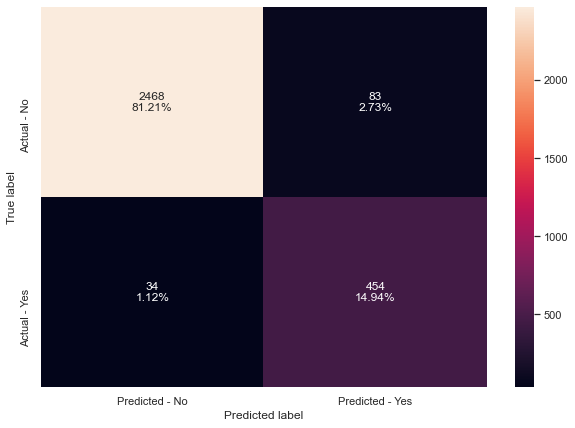

In [211]:
make_confusion_matrix(xgb_estimator_randomSearch_tuned,y_test)

**Observation**

1. This model is generalizing well with the data.
2. Test Recall is highest as compared to other model we have seen above.
3. Time taken is just 14.5 sec. This model seems to be behaving best by considering all factors.

# Comparing all models

In [223]:
# defining list of models
models = [lr_model_withoutSampling, lr_model_withUpSampling, lr_model_withDownSampling, bagging_estimator, rf_estimator,
          dTree, dTree1, abc, gbc, xgb, bagging_estimator_gridSearch_tuned, randomForestf_estimator_gridSearch_tuned, 
          dTree_estimator_gridSearch_tuned, abc_estimator_gridSearch_tuned, gb_estimator_gridSearch_tuned, 
          xgb_estimator_gridSearch_tuned, bagging_estimator_randomSearch_tuned, randomForestf_estimator_randomSearch_tuned, 
          dTree_estimator_randomSearch_tuned, abc_estimator_randomSearch_tuned, gb_estimator_randomSearch_tuned,
          xgb_estimator_randomSearch_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [225]:
comparison_frame = pd.DataFrame({'Model':['lr_model_withoutSampling','lr_model_withUpSampling','lr_model_withDownSampling',
                                          'bagging_estimator','randomForest_estimator','Decision Tree',
                                          'Decision Tree with Reduced Overfitting','Ada Boost classifier',
                                          'Gradient Boost Classifier', 'XGBoost Classifier', 'bagging_estimator_gridSearch_tuned',
                                          'randomForestf_estimator_gridSearch_tuned','dTree_estimator_gridSearch_tuned',
                                          'abc_estimator_gridSearch_tuned','gb_estimator_gridSearch_tuned','xgb_estimator_gridSearch_tuned',
                                          'bagging_estimator_randomSearch_tuned','randomForestf_estimator_randomSearch_tuned',
                                          'dTree_estimator_randomSearch_tuned','abc_estimator_randomSearch_tuned',
                                          'gb_estimator_randomSearch_tuned','xgb_estimator_randomSearch_tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
21            xgb_estimator_randomSearch_tuned            0.98           0.96   
15              xgb_estimator_gridSearch_tuned            0.98           0.96   
20             gb_estimator_randomSearch_tuned            1.00           0.97   
14               gb_estimator_gridSearch_tuned            1.00           0.97   
9                           XGBoost Classifier            1.00           0.97   
13              abc_estimator_gridSearch_tuned            1.00           0.96   
19            abc_estimator_randomSearch_tuned            1.00           0.96   
8                    Gradient Boost Classifier            0.98           0.96   
17  randomForestf_estimator_randomSearch_tuned            0.98           0.96   
16        bagging_estimator_randomSearch_tuned            1.00           0.96   
11    randomForestf_estimator_gridSearch_tuned            0.98           0.96   
10          bagging_estimator_gridSearch_tuned            1.00           0.96   
7                         Ada Boost classifier            0.96           0.95   
3                            bagging_estimator            1.00           0.95   
5                                Decision Tree            1.00           0.93   
2                    lr_model_withDownSampling            0.85           0.85   
12            dTree_estimator_gridSearch_tuned            0.93           0.90   
4                       randomForest_estimator            1.00           0.95   
6       Decision Tree with Reduced Overfitting            0.94           0.92   
18          dTree_estimator_randomSearch_tuned            0.90           0.89   
1                      lr_model_withUpSampling            0.85           0.85   
0                     lr_model_withoutSampling            0.89           0.89   

    Train_Recall  Test_Recall  Train_Precision  Test_Precision  
21          0.99         0.93             0.89            0.85  
15          1.00         0.92             0.88            0.82  
20          1.00         0.88             1.00            0.95  
14          0.99         0.88             0.99            0.95  
9           1.00         0.87             1.00            0.95  
13          0.99         0.85             1.00            0.91  
19          1.00         0.85             1.00            0.91  
8           0.90         0.83             0.96            0.92  
17          0.93         0.82             0.97            0.91  
16          0.99         0.82             1.00            0.92  
11          0.93         0.82             0.97            0.91  
10          0.98         0.81             1.00            0.92  
7           0.86         0.81             0.91            0.89  
3           0.98         0.79             0.99            0.91  
5           1.00         0.78             1.00            0.76  
2           0.76         0.74             0.51            0.51  
12          0.80         0.73             0.76            0.69  
4           1.00         0.73             1.00            0.94  
6           0.75         0.67             0.88            0.79  
18          0.56         0.52             0.74            0.71  
1           0.47         0.50             0.54            0.54  
0           0.50         0.49             0.74            0.73

**Observation**

* The best model is xgb_estimator_randomSearch_tuned , as it is giving highest accuracy and highest test recall.
* I will suggest this model to bank based on above observation as this model is also taking just 14.5 Seconds.
* Let's see the feature importance for this model

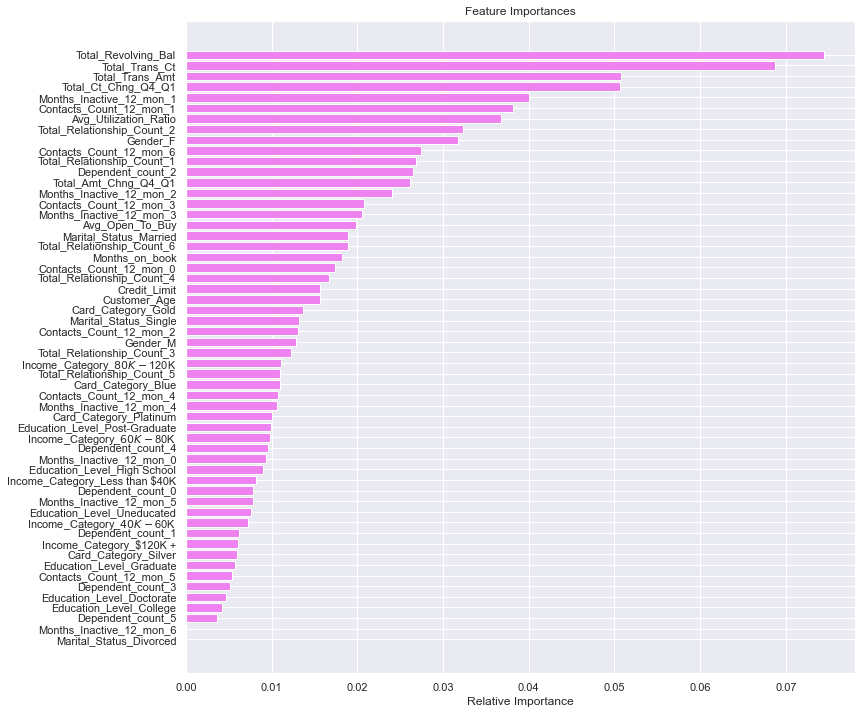

In [226]:
feature_names = X_train.columns
importances = xgb_estimator_randomSearch_tuned[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Total Revolving balance and total transaction count are the most important feature of the model.
* Total transaction amount is the next important feature followed by Total_Ct_Chng_Q4_Q1.

## Business Insight and Recommendation:

#### Model evaluation criterion:
* Model can make wrong predictions as:
    * Predicting an customer is going to churn the credit card but in reality, the customer did not churn the card - Loss of resources
    * Predicting an customer is not going to churn the credit card but in reality, the customer did churn the card - Loss of opportunity
    

* Which case is more important?
    * Predicting an customer is not going to churn the credit card but in reality, the customer did churn the card i.e. losing a good source of income.
    

* How to reduce this loss i.e need to reduce False Negatives?
    * Bank would want Recall to be maximized, greater the Recall lesser the chances of false negatives.


* Confusion matrix means :
  * True Positive (observed=1,predicted=1): Predicted that customer will churn the card and the customer did churn it. 
  * False Positive (observed=0,predicted=1): Predicted that customer will churn the card and the customer did not churn it. 
  * True Negative (observed=0,predicted=0): Predicted that customer will not churn the card and the customer did not churn it. 
  * False Negative (observed=1,predicted=0): Predicted that customer will not churn the card and the customer did churn it.
 

3. For XGboost random search tuned model the features "Total Revolving balance", "Total transaction count", "Total transaction amount", "Total_Ct_Chng_Q4_Q1", 'Months_Inactive_12_mon' seems to be top 5 features which influence the model's output. Bank can choose to target those specific customers to maximize the sales of the package.

4. After achieving the desired accuracy we can deploy the model for practical use. The Bank now can predict who will churn the card and who will not.